Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
num_days_R_prediction=21

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

### Load Data from Github - John Hopkins Institute 

In [4]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [5]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                         Recovered                  Canada   0.000000   
239                               NaN                    Laos  19.856270   
240                               NaN                   Libya  26.335100   
241                               NaN      West Bank and Gaza  31.952200   
242                               NaN           Guinea-Bissau  11.803700   
243                               NaN                    Mali  17.570692   
244                               NaN   Saint Kitts and Nevis  17.357822   
245             Northwest Territories                  Canada  64.825500   
246                             Yukon                  Canada  64.282300   
247                               NaN                  Kosovo  42.602636   
248                               NaN                   Burma  21.916200   
249                          Anguilla          United Kingdom  18.220600   
250            British Virgin Islands          United Kingdom  18.420700   
251          Turks and Caicos Islands          United Kingdom  21.694000   
252                               NaN              MS Zaandam   0.000000   
253                               NaN                Botswana -22.328500   
254                               NaN                 Burundi  -3.373100   
255                               NaN            Sierra Leone   8.460555   
256  Bonaire, Sint Eustatius and Saba             Netherlands  12.17840

## Get Population

In [6]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [7]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                         Recovered                  Canada   0.000000   
241                               NaN                    Laos  19.856270   
242                               NaN                   Libya  26.335100   
243                               NaN      West Bank and Gaza  31.952200   
244                               NaN           Guinea-Bissau  11.803700   
245                               NaN                    Mali  17.570692   
246                               NaN   Saint Kitts and Nevis  17.357822   
247             Northwest Territories                  Canada  64.825500   
248                             Yukon                  Canada  64.282300   
249                               NaN                  Kosovo  42.602636   
250                               NaN                   Burma  21.916200   
251                          Anguilla          United Kingdom  18.220600   
252            British Virgin Islands          United Kingdom  18.420700   
253          Turks and Caicos Islands          United Kingdom  21.694000   
254                               NaN              MS Zaandam   0.000000   
255                               NaN                Botswana -22.328500   
256                               NaN                 Burundi  -3.373100   
257                               NaN            Sierra Leone   8.460555   
258  Bonaire, Sint Eustatius and Saba             Netherlands  12.17840

In [8]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/4/20  \
185        0        0        0        0        0        0  ...     698   
186        0        0        0        0        0        0  ...    1063   
187        0        0        0        0        0        0  ...      12   
188        0        0        0        0        0        0  ...     818   
189        0        0        0        0        0        0  ...    1356   
190        0        0        0        0        0        0  ...       0   
191        0        0        0        0        0        0  ...       0   
192        0        0        0        0        0        0  ...       0   
193        0        0        0        0        0        0  ...      41   
194        0        0        0        0        0        0  ...     191   

     5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  5/11/20   Population   \
185     716     733     755     776     785      800      811    37,980,000   
186    1074    1089    1105    1114    1126     1135     1144    10,290,000   
187      12      12      12      12      13       14       14     2,870,256   
188     841     864     888     923     939      961      982    19,530,000   
189    1451    1537    1625    1723    1827     1915     2009   144,500,000   
190       0       0       0       0       0        0        0           NaN   
191       0       0       0       0       0        0        0           NaN   
192       0       0       0       0       0        0        0           NaN   
193      41      41      41      41      41       41       41        33,916   
194     200     209     219     229     239      246      255    34,695,447   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 117 columns]

In [9]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/4/20  5/5/20  5/6/20  5/7/20  \
175        0        0        0        0  ...     816     858     888     980   
176        0        0        0        0  ...    5635    5801    6464    6464   
177        0        0        0        0  ...     641     823     859     886   
178        0        0        0        0  ...       8       8       8       8   
179        0        0        0        0  ...     130     135     142     148   
180        0        0        0        0  ...   14427   15413   17527   18388   
181        0        0        0        0  ...    1315    1408    1506    1618   
182        0        0        0        0  ...    4095    4280    4655    4862   
183        0        0        0        0  ...    1712    1743    2076    2258   
184        0        0        0        0  ...    1810    1924    2070    2286   

     5/8/20  5/9/20  5/10/20  5/11/20   Population                 region  
175    1025    1068     1117     1250     4,636,000              Oman_nan  
176    7530    7809     8063     8555   197,000,000          Pakistan_nan  
177     886    4501     4687     4687     4,299,739            Panama_nan  
178       8       8        8        8           NaN  Papua New Guinea_nan  
179     152     155      165      170     7,111,652          Paraguay_nan  
180   19012   20246    21349    22406    32,870,710              Peru_nan  
181    1734    1842     1924     1999   104,900,000       Philippines_nan  
182    5184    5437     5698     5816    37,980,000            Poland_nan  
183    2422    2499     2549     2549    10,290,000          Portugal_nan  
184    2370    2449     2753     2840     2,870,256             Qatar_nan  

[10 rows x 117 columns]

In [10]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/4/20  \
185        0        0        0        0        0        0  ...   14006   
186        0        0        0        0        0        0  ...   25524   
187        0        0        0        0        0        0  ...   16191   
188        0        0        0        0        0        0  ...   13512   
189        0        0        0        0        0        0  ...  145268   
190        0        0        0        0        0        0  ...     261   
191        0        0        0        0        0        0  ...      18   
192        0        0        0        0        0        0  ...      17   
193        0        0        0        0        0        0  ...     582   
194        0        0        0        0        0        0  ...   28656   

     5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  5/11/20   Population   \
185   14431   14740   15047   15366   15651    15996    16326    37,980,000   
186   25702   26182   26715   27268   27406    27581    27679    10,290,000   
187   17142   17972   18890   20201   21331    22520    23623     2,870,256   
188   13837   14107   14499   14811   15131    15362    15588    19,530,000   
189  155370  165929  177160  187859  198676   209688   221344   144,500,000   
190     261     268     271     273     280      284      285           NaN   
191      18      18      18      18      18       18       18           NaN   
192      17      17      17      17      17       17       17           NaN   
193     589     608     622     623     637      628      628        33,916   
194   30251   31938   33731   35432   37136    39048    41014    34,695,447   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 117 columns]

In [11]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   5/4/20   5/5/20   5/6/20  \
220        0        0        0        0  ...       75       78       78   
221        0        0        0        0  ...      544      545      545   
222        0        0        0        0  ...      144      144      144   
223        0        0        0        0  ...      325      326      327   
224        0        0        0        0  ...       11       11       11   
225        0        0        0        0  ...   190584   194990   201101   
226        0        0        0        0  ...      657      670      673   
227        2        2        5        5  ...  1180375  1204351  1229331   
228        0        0        0        0  ...     2189     2207     2233   
229        0        0        0        0  ...      357      361      379   

      5/7/20   5/8/20   5/9/20  5/10/20  5/11/20   Population   \
220       80       81       81       81       84           NaN   
221      545      545      545      545      546       173,519   
222      144      146      146      146      147        33,693   
223      329      329      329      330      330        84,939   
224       11       11       11       11       11         4,991   
225   206715   211364   215260   219183   223060    66,440,000   
226      684      694      702      707      711     3,471,150   
227  1257023  1283929  1309550  1329260  1347881   327,200,000   
228     2298     2325     2349     2418     2486    33,363,556   
229      381      388      402      414      422           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 117 columns]

## Create Time Series + Plots

In [12]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [13]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [14]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

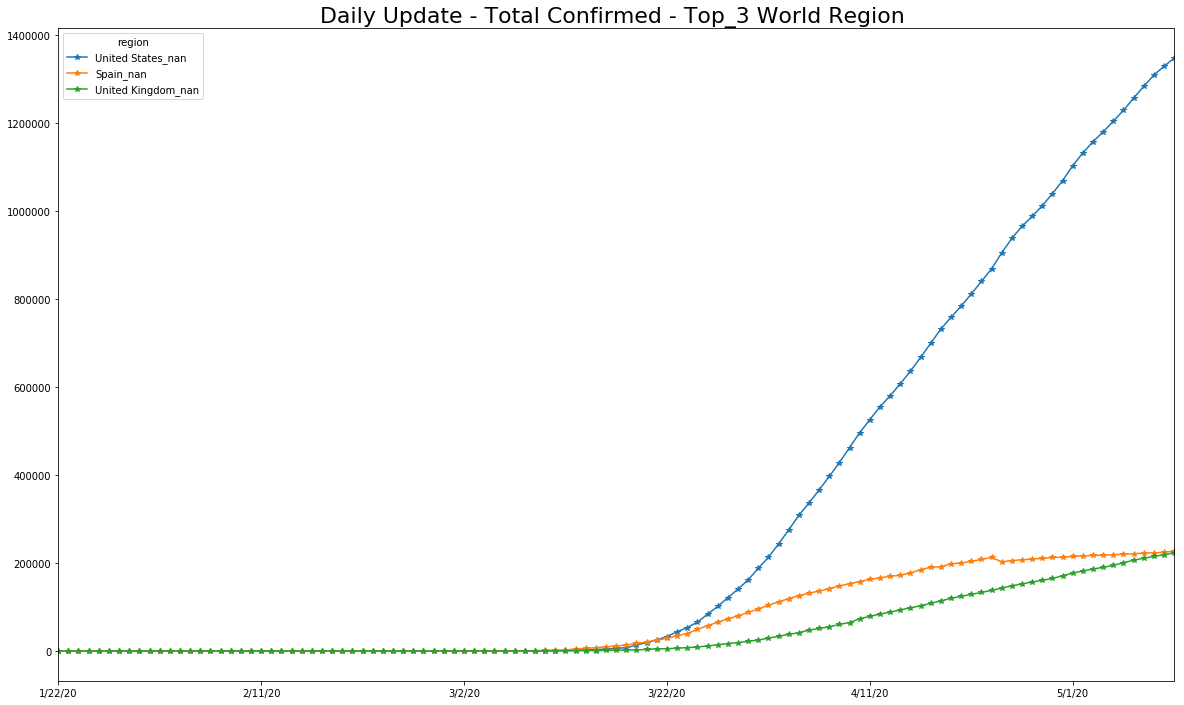

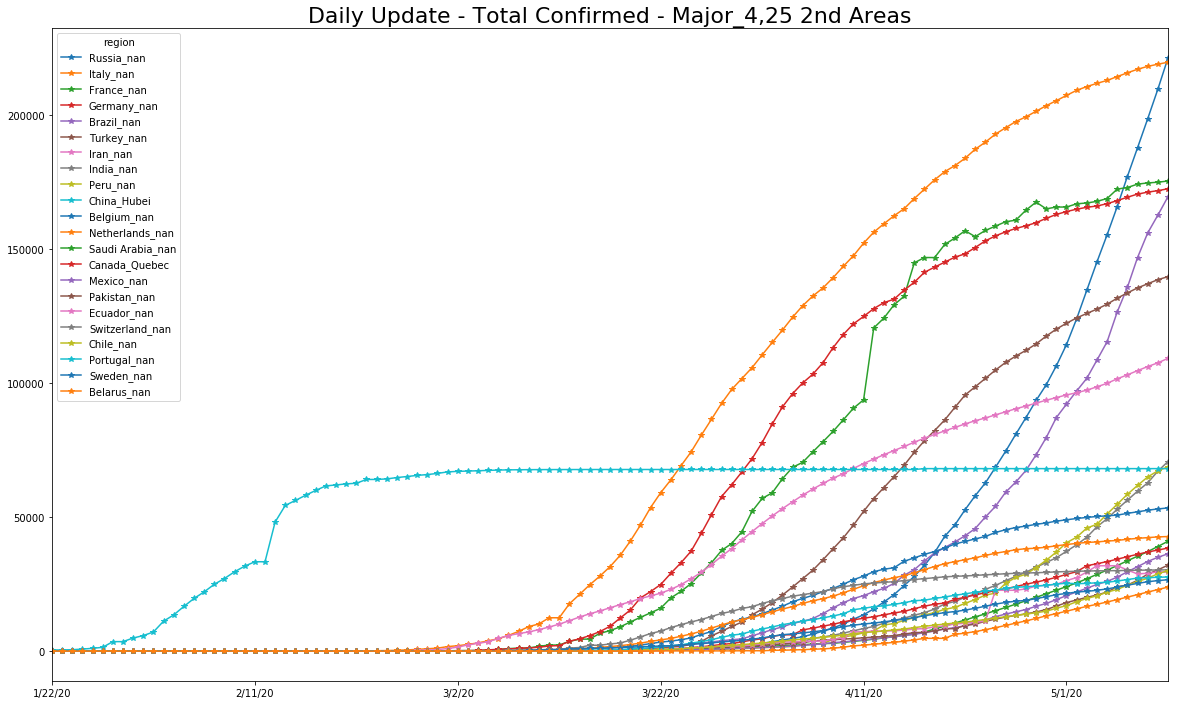

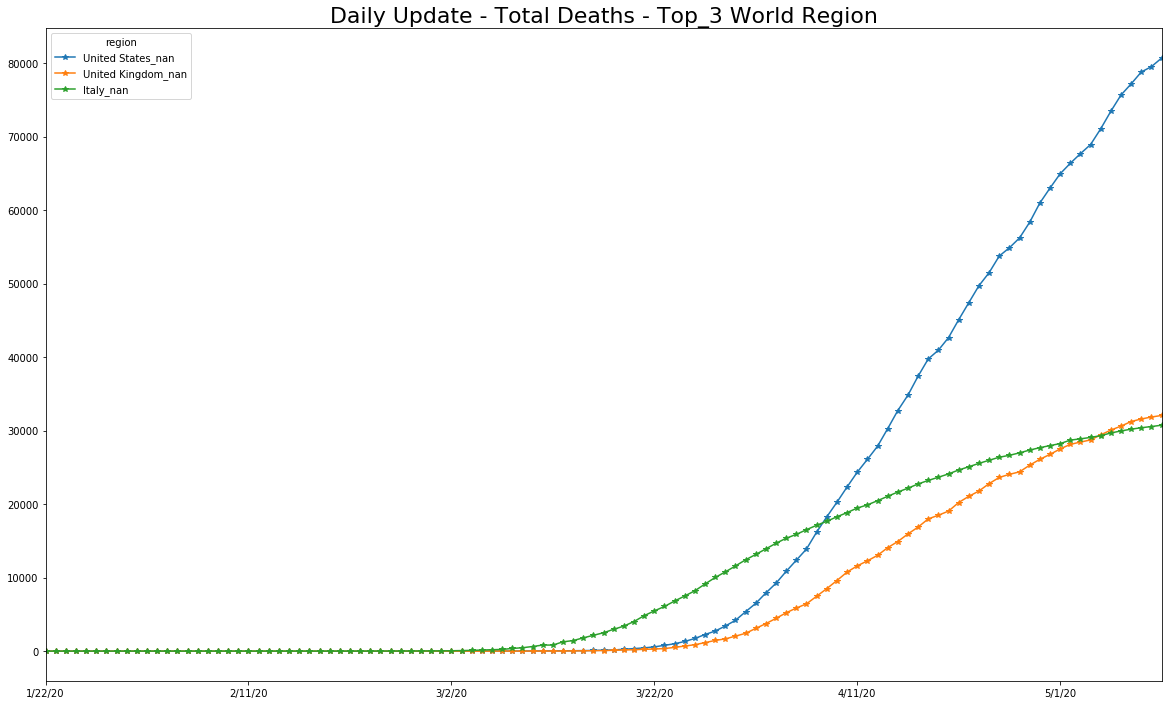

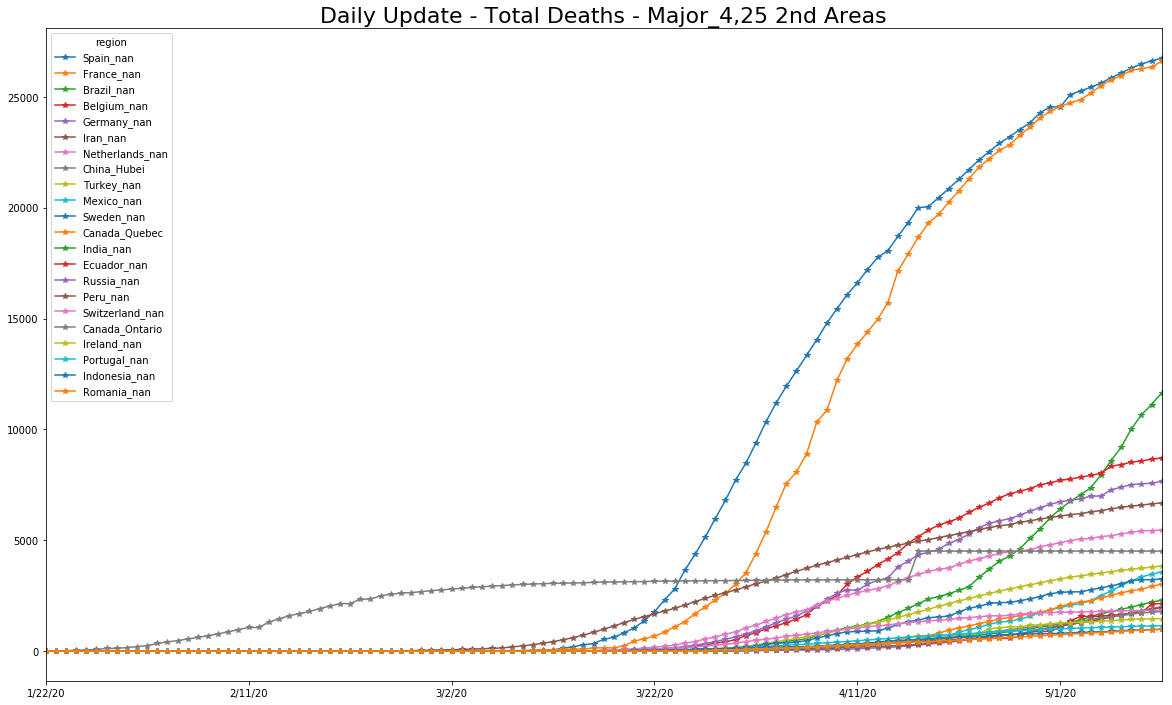

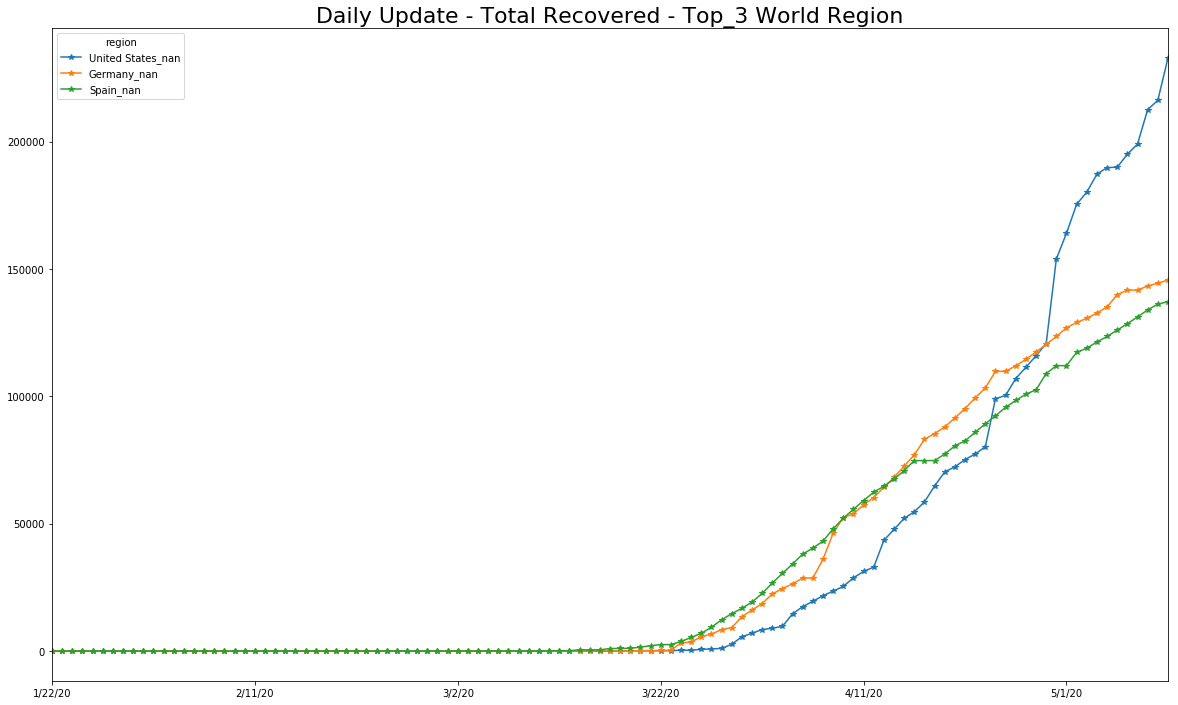

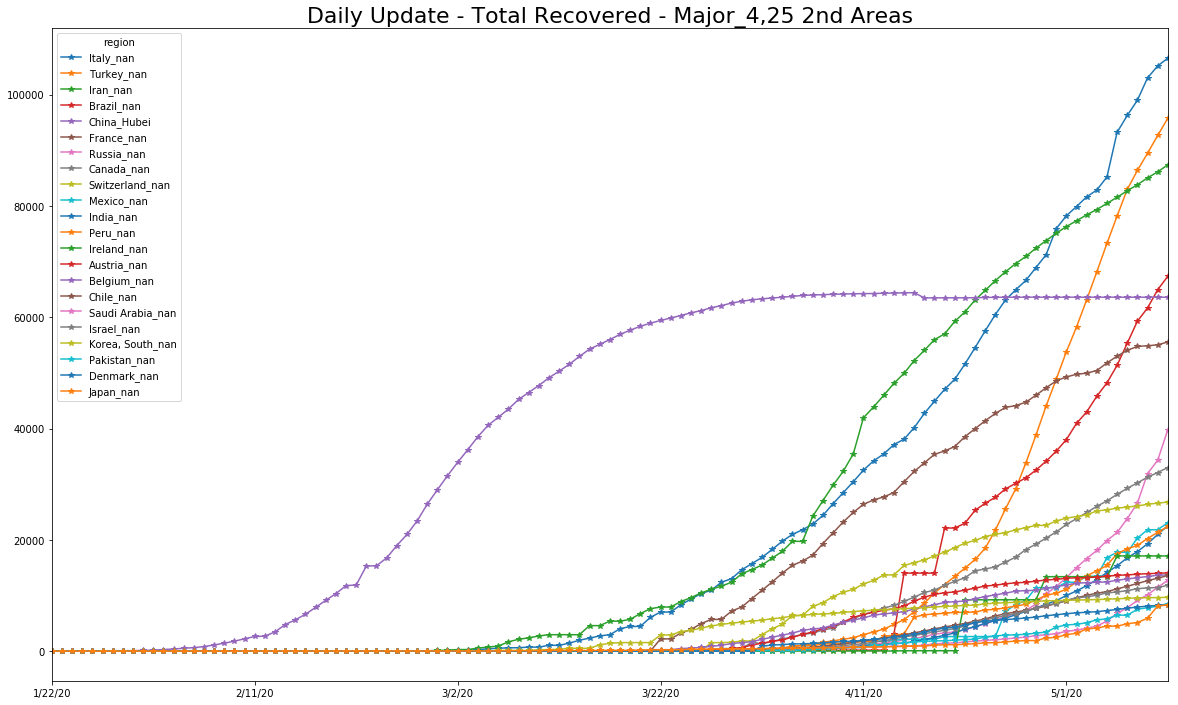

In [15]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [16]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [17]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [18]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
            continue
        if confirmed.iloc[i,vpos] in my_weather_fetch_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/05/12


HTTPError: 403 Client Error: Forbidden for url: https://api.weatherbit.io/v2.0/history/daily?key=27a4e12ebc7f41b2bd6e300015f1a090&lat=-33.8688&lon=151.2093&start_date=2020-05-12&end_date=2020-05-13

In [ ]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [ ]:
w[:]

## Kalman Filter With R

In [20]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 26/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[35:]
ts_d=ts_d[35:]
ts_rec=ts_rec[35:]

In [21]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/26/20                1            0            1            0           0   
2/27/20                1            0            1            0           0   
2/28/20                1            0            1            0           0   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/26/20                        0              0            0   
2/27/20                        0              0            0   
2/28/20                        0              0            0   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
2/26/20                                       0                          4   
2/27/20                                       0                          4   
2/28/20                                       0                          4   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/26/20  ...                 57            0               0              0   
2/27/20  ...                 58            0               0              0   
2/28/20  ...                 60            0               0              0   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/26/20           16                       0                   0          0   
2/27/20           16                       0                   0          0   
2/28/20           16                       0                   0          0   

region   Zambia_nan  Zimbabwe_nan  
2/26/20           0             0  
2/27/20           0             0  
2/28/20           0             0  

[3 rows x 266 columns]

In [22]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
5/8/20              3778          850         5369          752          43   
5/9/20              4033          856         5558          754          43   
5/10/20             4402          868         5723          755          45   
5/11/20             4687          872         5891          755          45   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
5/8/20                        25           5611         3029   
5/9/20                        25           5776         3175   
5/10/20                       25           6034         3313   
5/11/20                       25           6278         3392   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
5/8/20                                      107                       3051   
5/9/20                                      107                       3053   
5/10/20                                     107                       3053   
5/11/20                                     107                       3053   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
5/8/20   ...            1283929          694            2325            388   
5/9/20   ...            1309550          702            2349            402   
5/10/20  ...            1329260          707            2418            414   
5/11/20  ...            1347881          711            2486            422   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
5/8/20           288                     375                   6         34   
5/9/20           288                     375                   6         34   
5/10/20          288                     375                   6         51   
5/11/20          288                     375                   6         56   

region   Zambia_nan  Zimbabwe_nan  
5/8/20          167            34  
5/9/20          252            35  
5/10/20         267            36  
5/11/20         267            36  

[4 rows x 266 columns]

In [23]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [24]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [25]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [26]:
p=%R pred_all

In [27]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [28]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [29]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [30]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [31]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [32]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [33]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [34]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-02-27  Afghanistan_nan          1             0             0   
2     2020-02-28  Afghanistan_nan          1             0             0   
3     2020-02-29  Afghanistan_nan          1             0             0   
4     2020-03-01  Afghanistan_nan          1             0             0   
5     2020-03-02  Afghanistan_nan          1             0             0   
6     2020-03-03  Afghanistan_nan          1             0             0   
7     2020-03-04  Afghanistan_nan          1             0             0   
8     2020-03-05  Afghanistan_nan          1             0             0   
9     2020-03-06  Afghanistan_nan          1             0             0   
10    2020-03-07  Afghanistan_nan          1             0             0   
11    2020-03-08  Afghanistan_nan          4             0             0   
12    2020-03-09  Afghanistan_nan          4             3             3   
13    2020-03-10  Afghanistan_nan          5             0             3   
14    2020-03-11  Afghanistan_nan          7             1             4   
15    2020-03-12  Afghanistan_nan          7             2             3   
16    2020-03-13  Afghanistan_nan          7             0             3   
17    2020-03-14  Afghanistan_nan         11             0             2   
18    2020-03-15  Afghanistan_nan         16             4             4   
19    2020-03-16  Afghanistan_nan         21             5             9   
20    2020-03-17  Afghanistan_nan         22             5            14   
21    2020-03-18  Afghanistan_nan         22             1            11   
22    2020-03-19  Afghanistan_nan         22             0             6   
23    2020-03-20  Afghanistan_nan         24             0             1   
24    2020-03-21  Afghanistan_nan         24             2             2   
25    2020-03-22  Afghanistan_nan         40             0             2   
26    2020-03-23  Afghanistan_nan         40            16            18   
27    2020-03-24  Afghanistan_nan         74             0            16   
28    2020-03-25  Afghanistan_nan         84            34            50   
29    2020-03-26  Afghanistan_nan         94            10            44   
30    2020-03-27  Afghanistan_nan        110            10            54   
...          ...              ...        ...           ...           ...   
20606 2020-04-13     Zimbabwe_nan         17             0             3   
20607 2020-04-14     Zimbabwe_nan         17             3             4   
20608 2020-04-15     Zimbabwe_nan         23             0             3   
20609 2020-04-16     Zimbabwe_nan         23             6             9   
20610 2020-04-17     Zimbabwe_nan         24             0             6   
20611 2020-04-18     Zimbabwe_nan         25             1             7   
20612 2020-04-19     Zimbabwe_nan         25             1             2   
20613 2020-04-20     Zimbabwe_nan         25             0             2   
20614 2020-04-21     Zimbabwe_nan         28             0             1   
20615 2020-04-22     Zimbabwe_nan         28             3             3   
20616 2020-04-23     Zimbabwe_nan         28             0             3   
20617 2020-04-24     Zimbabwe_nan         29             0             3   
20618 2020-04-25     Zimbabwe_nan         31             1             1   
20619 2020-04-26     Zimbabwe_nan         31             2             3   
20620 2020-04-27     Zimbabwe_nan         32             0             3   
20621 2020-04-28     Zimbabwe_nan         32             1             3   
20622 2020-04-29     Zimbabwe_nan         32             0             1   
20623 2020-04-30     Zimbabwe_nan         40             0             1   
20624 2020-05-01     Zimbabwe_nan         40             8             8   
20625 2020-05-02     Zimbabwe_nan         34             0             8   
20626 2020-05-03     Zimbabwe_nan         34            -6  

In [35]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [36]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
20635 2020-05-12  Zimbabwe_nan          0             0             2   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
20635             2         100.027778         105.911765         105.911765   

       last_day  kalman_prediction  population  infected_rate  min  max  
20635        36               36.0    10000000   3.700000e-08  NaN  NaN

In [37]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="Shared -- Ratio in Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage_infected_rate_confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage_factor_9.8_10_infected_rate_confirmed']=ratiod['infected_rate']*100*9.8
ratiod['delta_new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta_new_cases_per_1M_hab']=ratiod['delta_new_cases']/ratiod['population']*1000000

ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
20633  2020-05-10  Zimbabwe_nan         36             1             1   
20634  2020-05-11  Zimbabwe_nan         36             1             2   
20635  2020-05-12  Zimbabwe_nan          0             0             2   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
20633             1         102.970588         102.970588         102.970588   
20634             2         102.885714         105.911765         105.911765   
20635             2         100.027778         105.911765         105.911765   

       last_day  kalman_prediction  population  infected_rate  min  max  \
20633        35               34.0    10000000   3.600000e-08  NaN  NaN   
20634        36               35.0    10000000   3.700000e-08  NaN  NaN   
20635        36               36.0    10000000   3.700000e-08  NaN  NaN   

       population_percentage_infected_rate_confirmed  \
20633                                       0.000004   
20634                                       0.000004   
20635                                       0.000004   

       population_percentage_factor_9.8_10_infected_rate_confirmed  \
20633                                           0.000035             
20634                                           0.000036             
20635                                           0.000036             

       delta_new_cases  delta_new_cases_per_1M_hab  
20633             -1.0                        -0.1  
20634             -1.0                        -0.1  
20635              0.0                         0.0

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
256  United States_nan  2.496932e+10  158016.848391  22744.157895


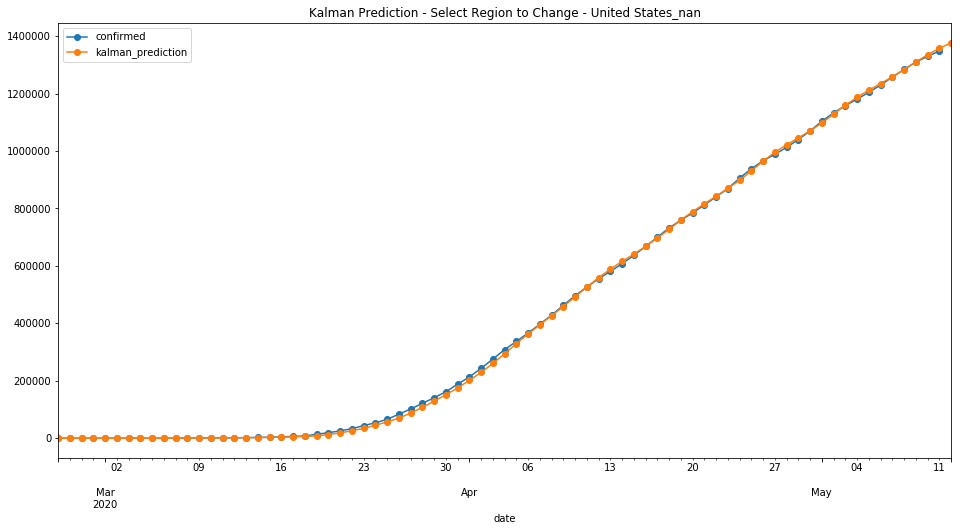

In [38]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
208  Russia_nan  7.102456e+08  26650.434042  4043.736842


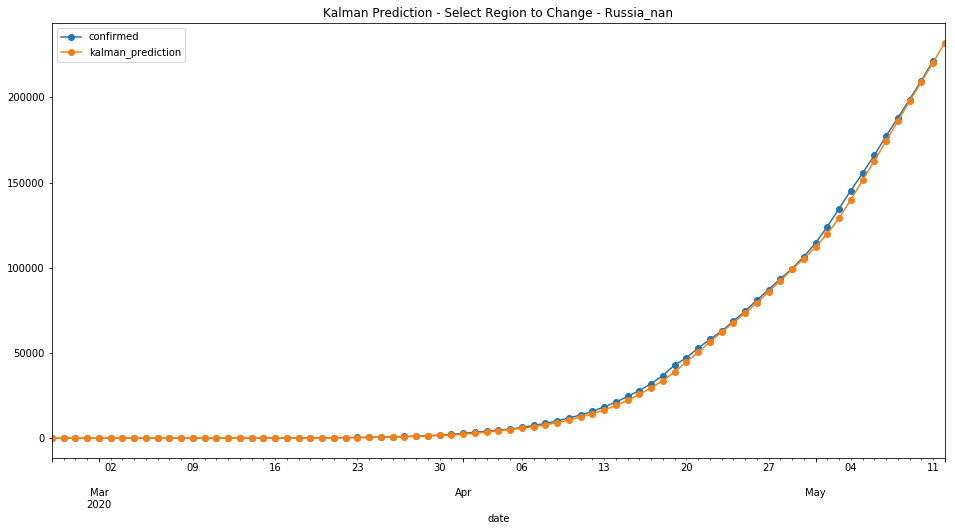

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
30  Brazil_nan  4.274124e+08  20673.955638  3292.657895


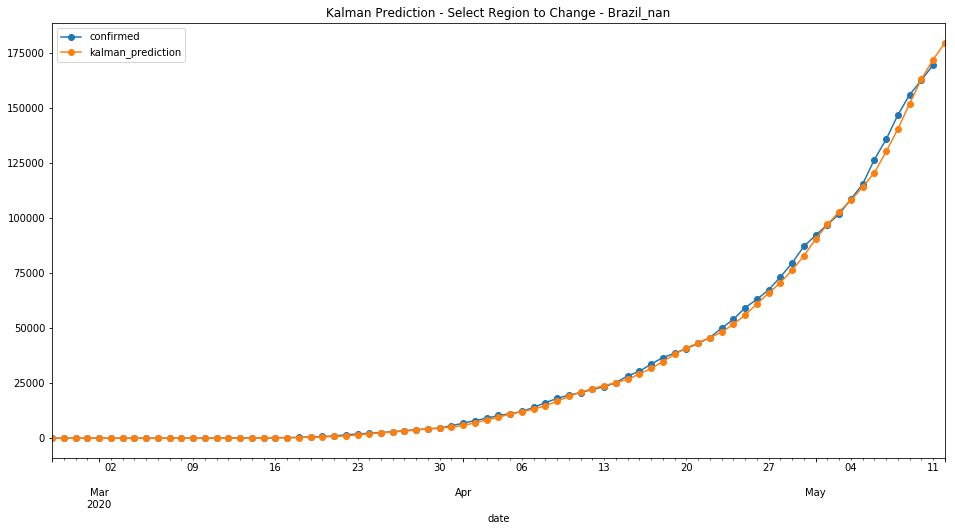

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse          mae
255  United Kingdom_nan  6.875917e+08  26221.970357  3852.078947


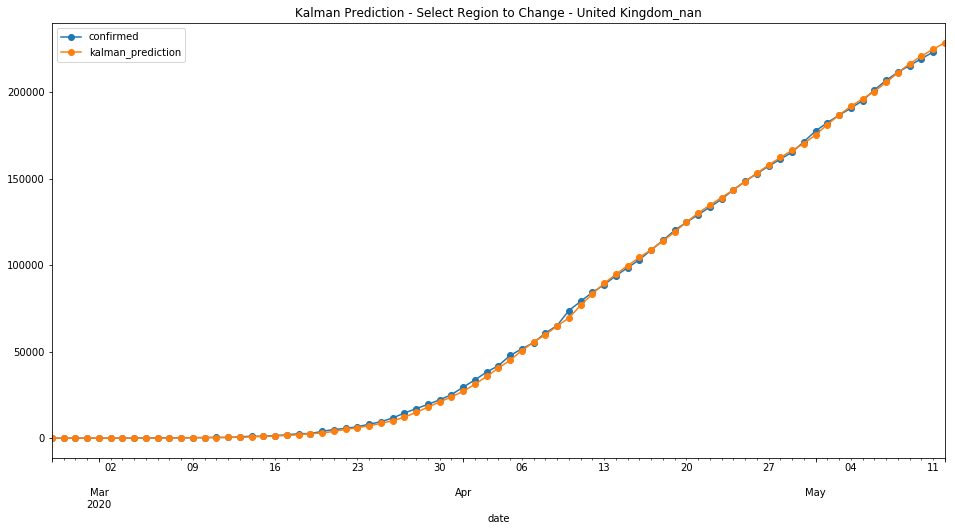

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwt0a1hnz
  JVM stdout: /tmp/tmpwt0a1hnz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpwt0a1hnz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 6 months and 15 days !!!
H2O cluster name:           H2O_from_python_unknownUser_z4196k
H2O cluster total nodes:    1
H2O cluster free memory:    3 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-42)).strftime('%Y-%m-%d')
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-03-31
last_train_date= 2020-05-11
first_bootstrap_date= 2020-05-03
boost_bootstrap_date= 2020-05-08
first_test_date= 2020-05-02
last_test_date= 2020-05-12
first_valid_date= 2020-05-10


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   2669.0       2704 2020-05-03  Afghanistan_nan
1   2947.0       2894 2020-05-04  Afghanistan_nan
2   3122.0       3224 2020-05-05  Afghanistan_nan
3   3534.0       3392 2020-05-06  Afghanistan_nan
4   3619.0       3563 2020-05-07  Afghanistan_nan
5   3828.0       3778 2020-05-08  Afghanistan_nan
6   4049.0       4033 2020-05-09  Afghanistan_nan
7   4316.0       4402 2020-05-10  Afghanistan_nan
8   4747.0       4687 2020-05-11  Afghanistan_nan
9   4994.0          0 2020-05-12  Afghanistan_nan
10   800.0        795 2020-05-03      Albania_nan
11   803.0        803 2020-05-04      Albania_nan
12   810.0        820 2020-05-05      Albania_nan
13   830.0        832 2020-05-06      Albania_nan
14   840.0        842 2020-05-07      Albania_nan
15   850.0        850 2020-05-08      Albania_nan
16   857.0        856 2020-05-09      Albania_nan
17   862.0        868 2020-05-10      Albania_nan
18   876.0        872 2020-05-11      Albania_nan
19   876.0          0 2020-05-12      Albania_nan
20  4504.0       4474 2020-05-03      Algeria_nan
21  4702.0       4648 2020-05-04      Algeria_nan
22  4873.0       4838 2020-05-05      Algeria_nan
23  5074.0       4997 2020-05-06      Algeria_nan
24  5225.0       5182 2020-05-07      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  2266.0       2279 2020-05-08  Azerbaijan_nan
176  2343.0       2422 2020-05-09  Azerbaijan_nan
177  2523.0       2519 2020-05-10  Azerbaijan_nan
178  2598.0       2589 2020-05-11  Azerbaijan_nan
179  2668.0          0 2020-05-12  Azerbaijan_nan
180    85.0         83 2020-05-03     Bahamas_nan
181    84.0         83 2020-05-04     Bahamas_nan
182    84.0         89 2020-05-05     Bahamas_nan
183    91.0         92 2020-05-06     Bahamas_nan
184    93.0         92 2020-05-07     Bahamas_nan
185    94.0         92 2020-05-08     Bahamas_nan
186    94.0         92 2020-05-09     Bahamas_nan
187    93.0         92 2020-05-10     Bahamas_nan
188    92.0         93 2020-05-11     Bahamas_nan
189    93.0          0 2020-05-12     Bahamas_nan
190  3460.0       3383 2020-05-03     Bahrain_nan
191  3547.0       3533 2020-05-04     Bahrain_nan
192  3717.0       3720 2020-05-05     Bahrain_nan
193  3918.0       3934 2020-05-06     Bahrain_nan
194  4154.0       4199 2020-05-07     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220  16768.0      16705 2020-05-03  Belarus_nan
221  17639.0      17489 2020-05-04  Belarus_nan
222  18373.0      18350 2020-05-05  Belarus_nan
223  19267.0      19255 2020-05-06  Belarus_nan
224  20182.0      20168 2020-05-07  Belarus_nan
225  21089.0      21101 2020-05-08  Belarus_nan
226  22028.0      22052 2020-05-09  Belarus_nan
227  22991.0      22973 2020-05-10  Belarus_nan
228  23902.0      23906 2020-05-11  Belarus_nan
229  24834.0          0 2020-05-12  Belarus_nan
230  50054.0      49906 2020-05-03  Belgium_nan
231  50358.0      50267 2020-05-04  Belgium_nan
232  50625.0      50509 2020-05-05  Belgium_nan
233  50776.0      50781 2020-05-06  Belgium_nan
234  50989.0      51420 2020-05-07  Belgium_nan
235  51786.0      52011 2020-05-08  Belgium_nan
236  52375.0      52596 2020-05-09  Belgium_nan
237  52963.0      53081 2020-05-10  Belgium_nan
238  53397.0      53449 2020-05-11  Belgium_nan
239  53729.0          0 2020-05-12  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data',model_v2.r2(valid=True))

# MSE on the training data =  6491702.685299693
# MSE on the validation data =  11679766170.952236
# R^2 on the training data =  0.9996614444799073
# R^2 on the validation data 0.6767081759930003


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1589296364439_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 6491702.685299693
RMSE: 2547.881999877485
MAE: 452.8741230148627
RMSLE: 0.40845120209995883
Mean Residual Deviance: 6491702.685299693

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 11679766170.952236
RMSE: 108072.96688326936
MAE: 32083.609535884894
RMSLE: 5.807377383056619
Mean Residual Deviance: 11679766170.952236
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2020-05-12 15:12:53  0.070 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2020-05-12 15:12:54  0.382 sec   1.0                8166.301813879303   1350.3122081867625  66688485.31536839    141534.69445047062  33661.18539922805   20032069733.188076
     2020-05-12 15:12:54  0.487 sec   2.0                6603.493247018498   1189.1765785501598  43606123.0634189     141727.7301486301   33670.0404116676    20086749493.082916
     2020-05-12 15:12:54  0.570 sec   3.0                5817.953530460595   1167.3744482870254  33848583.282598905   141118.26177787446  33552.70365862165   19914363807.208702
     2020-05-12 15:12:54  0.642 sec   4.0                5530.913595788948   1102.216902369447   30591005.204083037   141470.48282197095  33666.02556762695   20013897509.881573
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2020-05-12 15:12:57  4.014 sec   53.0               3610.8454529827486  610.2244626630102   13038204.88532619    115708.86017148154  32434.908629418274  13388540322.183468
     2020-05-12 15:13:01  8.020 sec   179.0              2483.7301128263543  465.94743026982655  6168915.273360414    111826.44119806756  32196.032279589534  12505152951.024864
     2020-05-12 15:13:05  12.023 sec  344.0              2596.8639612802904  454.3992792082257   6743702.433396361    109540.24254197716  32165.919311608668  11999064736.155182
     2020-05-12 15:13:09  16.027 sec  479.0              2534.803783565671   452.4014437709353   6425230.221178841    108250.20738821404  32066.913086384764  11718107399.591349
     2020-05-12 15:13:10  16.971 sec  500.0              2547.881999877485   452.8741230148627   6491702.685299693    108072.96688326936  32083.609535884894  11679766170.952236


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
last_day           8.4652e+15             1                    0.311043
kalman_prediction  7.66241e+15            0.905165             0.281545
7_day_change       4.74652e+15            0.560709             0.174405
3_day_change       2.90892e+15            0.343633             0.106885
1_day_change       1.73821e+15            0.205336             0.0638683
region             7.35268e+14            0.0868577            0.0270165
infected_rate      5.52576e+14            0.0652761            0.0203037
1_day_change_rate  1.92875e+14            0.0227844            0.00708692
3_day_change_rate  1.29193e+14            0.0152617            0.00474705
7_day_change_rate  5.42127e+13            0.00640418           0.00199197
min                2.46088e+13            0.00290706           0.00090422
max                5.55736e+12            0.000656495          0.000204198

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         8.465202e+15           1.000000    0.311043
1   kalman_prediction         7.662406e+15           0.905165    0.281545
2        7_day_change         4.746515e+15           0.560709    0.174405
3        3_day_change         2.908922e+15           0.343633    0.106885
4        1_day_change         1.738211e+15           0.205336    0.063868
5              region         7.352679e+14           0.086858    0.027016
6       infected_rate         5.525757e+14           0.065276    0.020304
7   1_day_change_rate         1.928745e+14           0.022784    0.007087
8   3_day_change_rate         1.291935e+14           0.015262    0.004747
9   7_day_change_rate         5.421267e+13           0.006404    0.001992
10                min         2.460885e+13           0.002907    0.000904
11                max         5.557362e+12           0.000656    0.000204

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


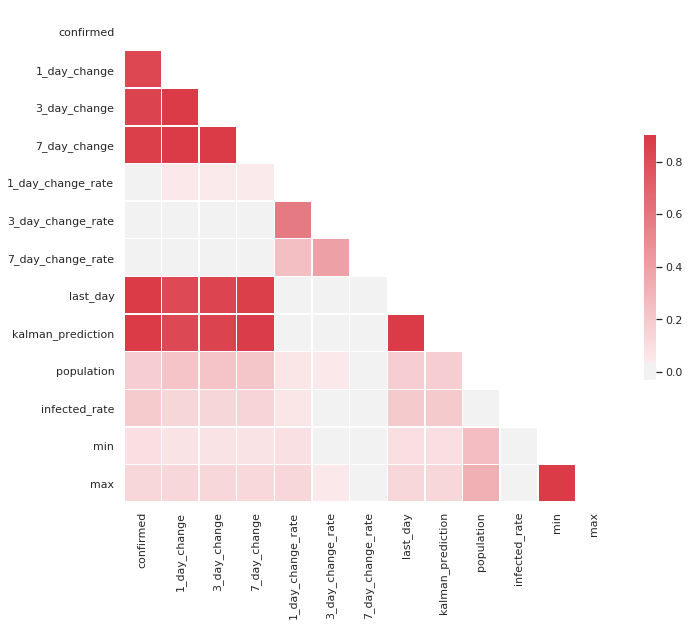

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.829251
3_day_change         0.851907
7_day_change         0.876265
1_day_change_rate    0.029323
3_day_change_rate    0.001631
7_day_change_rate   -0.011087
last_day             0.971051
kalman_prediction    0.971684
population           0.179495
infected_rate        0.191157
min                  0.094410
max                  0.129574
Name: confirmed, dtype: float64


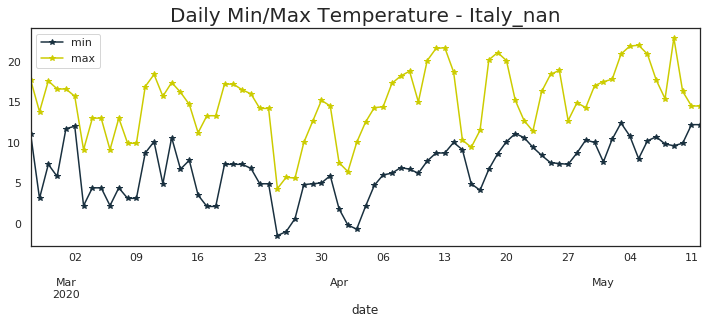

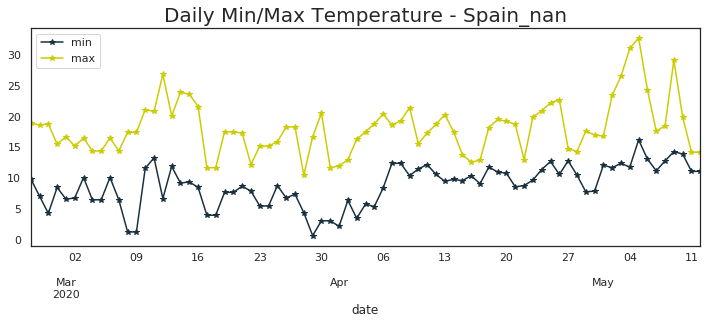

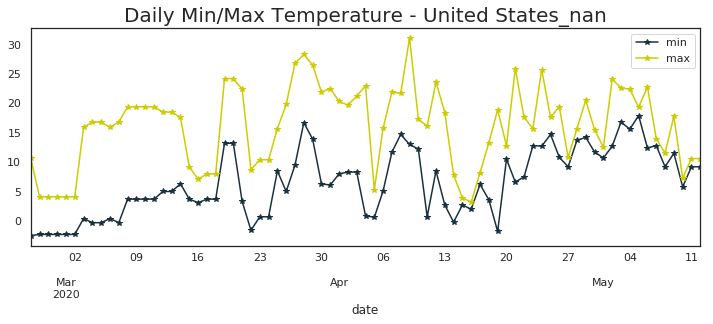

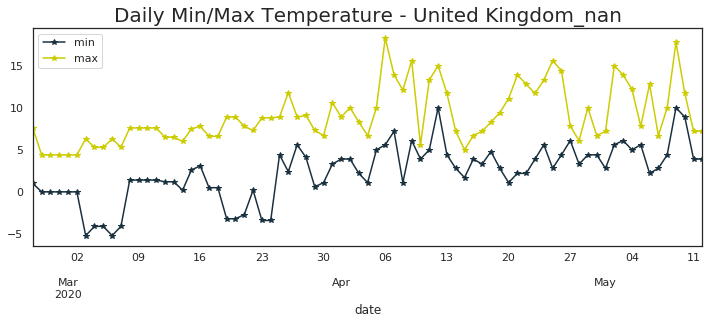

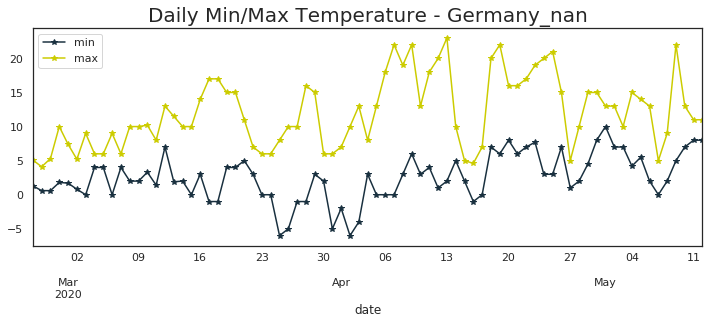

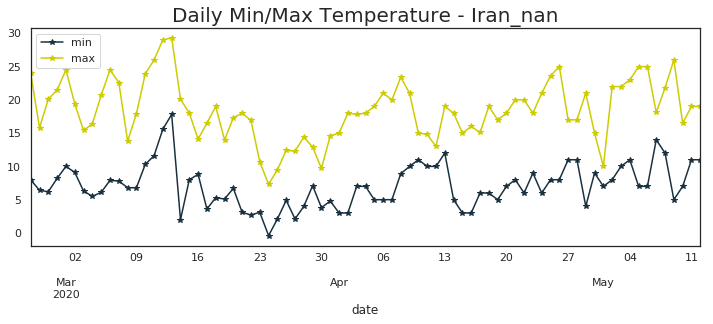

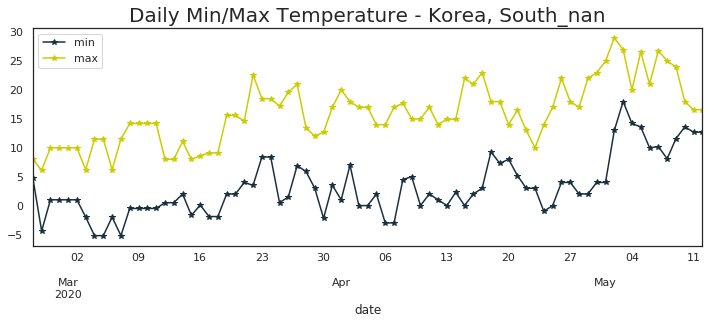

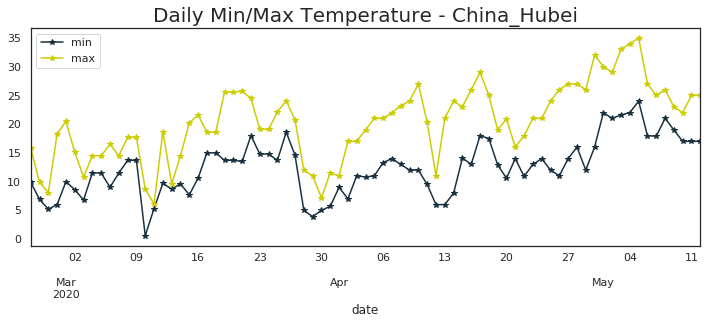

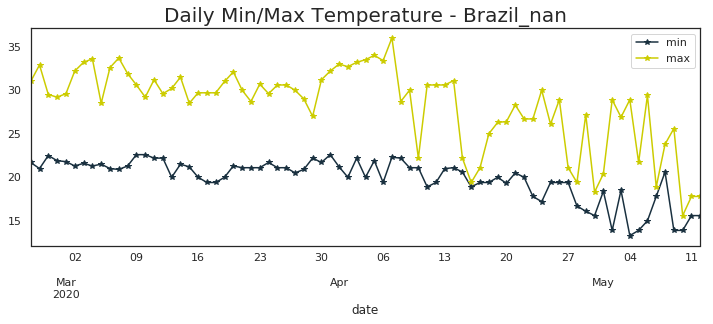

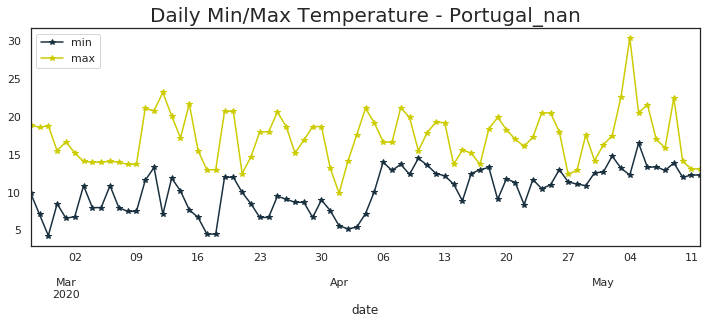

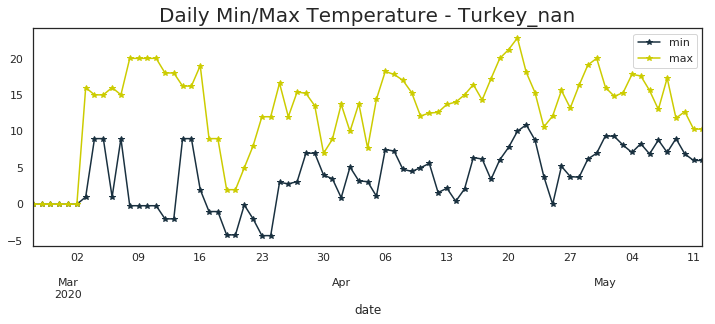

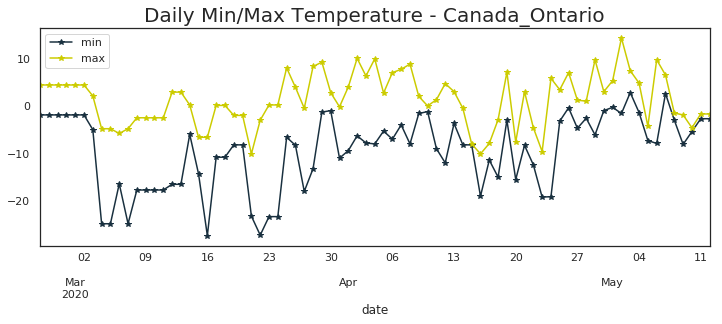

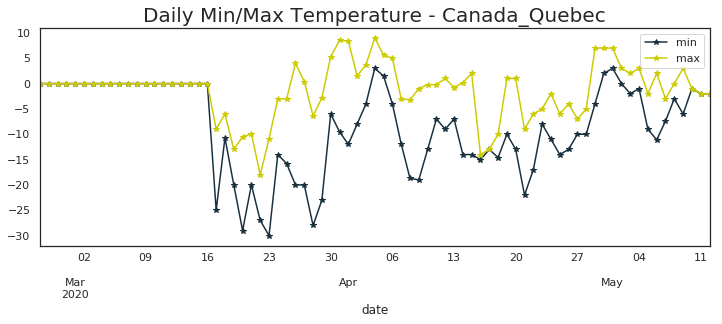

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.9  31.1
Spain_nan                   16.2  32.7
United Kingdom_nan          10.0  18.3
Russia_nan                  13.0  30.0
Italy_nan                   12.4  22.9
France_nan                  14.2  23.8
Germany_nan                 10.0  23.0
Brazil_nan                  22.6  36.0
Turkey_nan                  10.9  22.8
Iran_nan                    17.8  29.3
India_nan                   30.0  43.0
Peru_nan                     0.0   0.0
China_Hubei                 24.0  35.0
Belgium_nan                 17.8  26.1
Netherlands_nan             15.6  26.1
Saudi Arabia_nan             0.0   0.0
Canada_Quebec                3.0   9.0
Mexico_nan                   0.0   0.0
Pakistan_nan                15.0  23.7
Ecuador_nan                  0.0   0.0
Switzerland_nan             12.9  20.1
Chile_nan                    0.0   0.0
Portugal_nan                

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

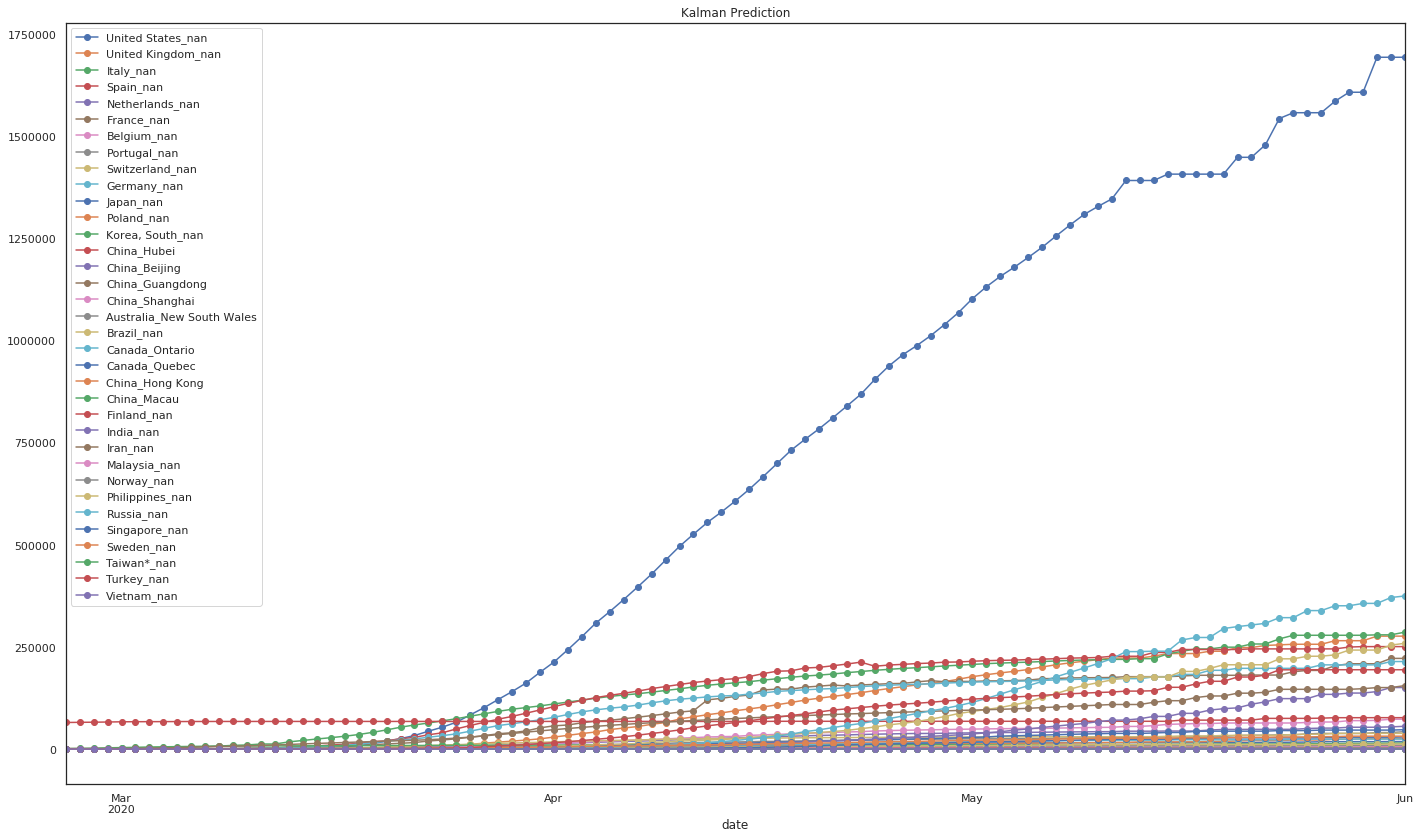

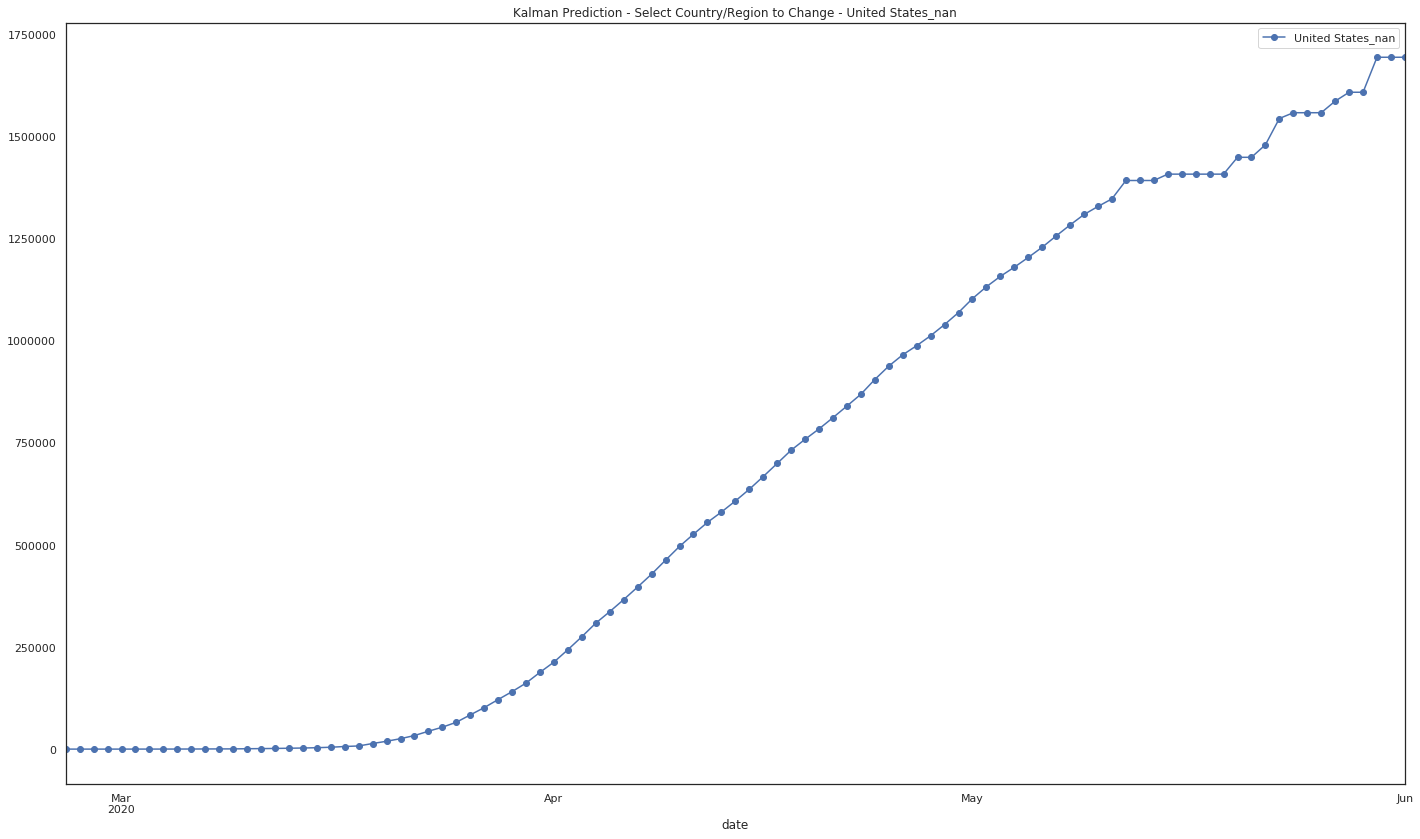

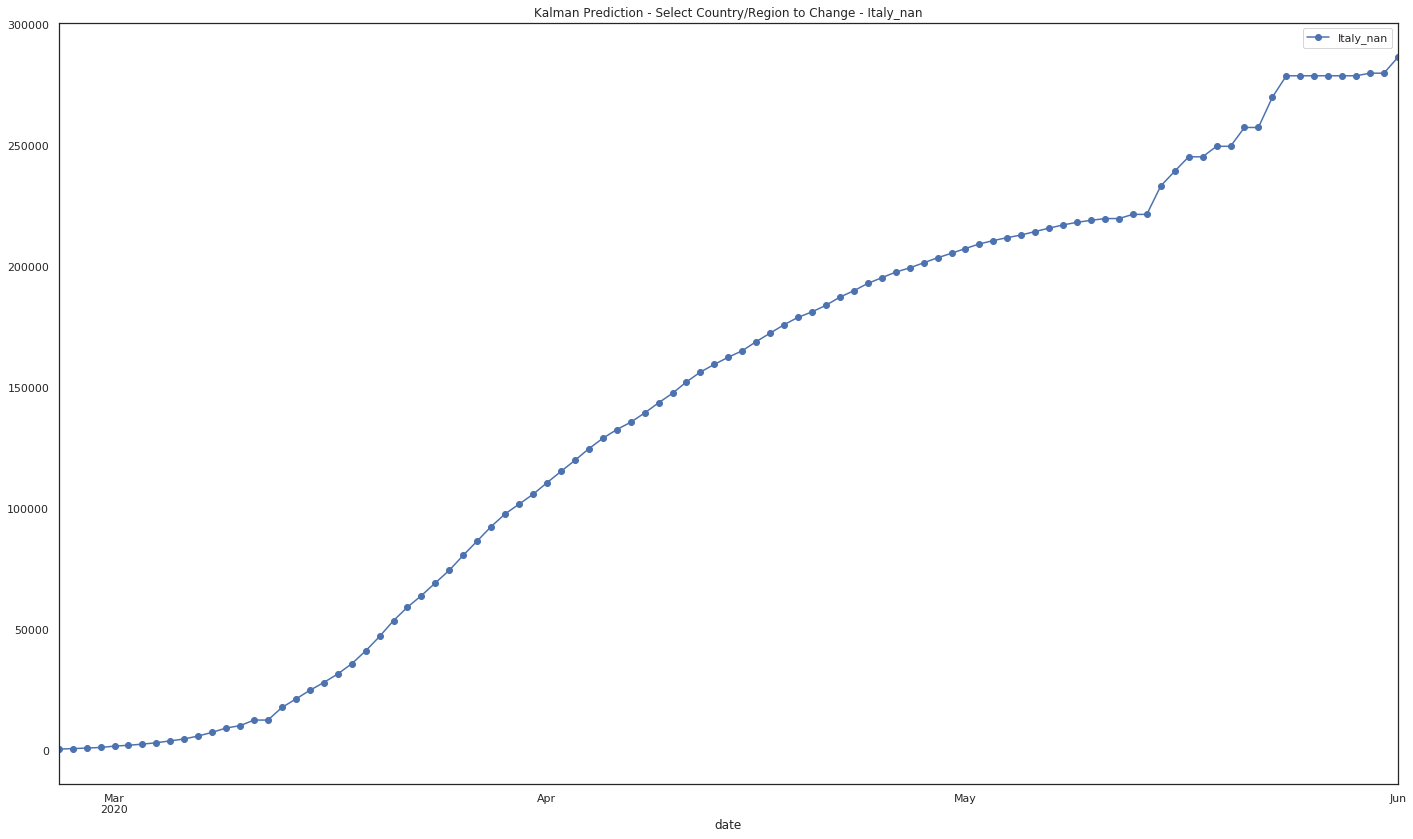

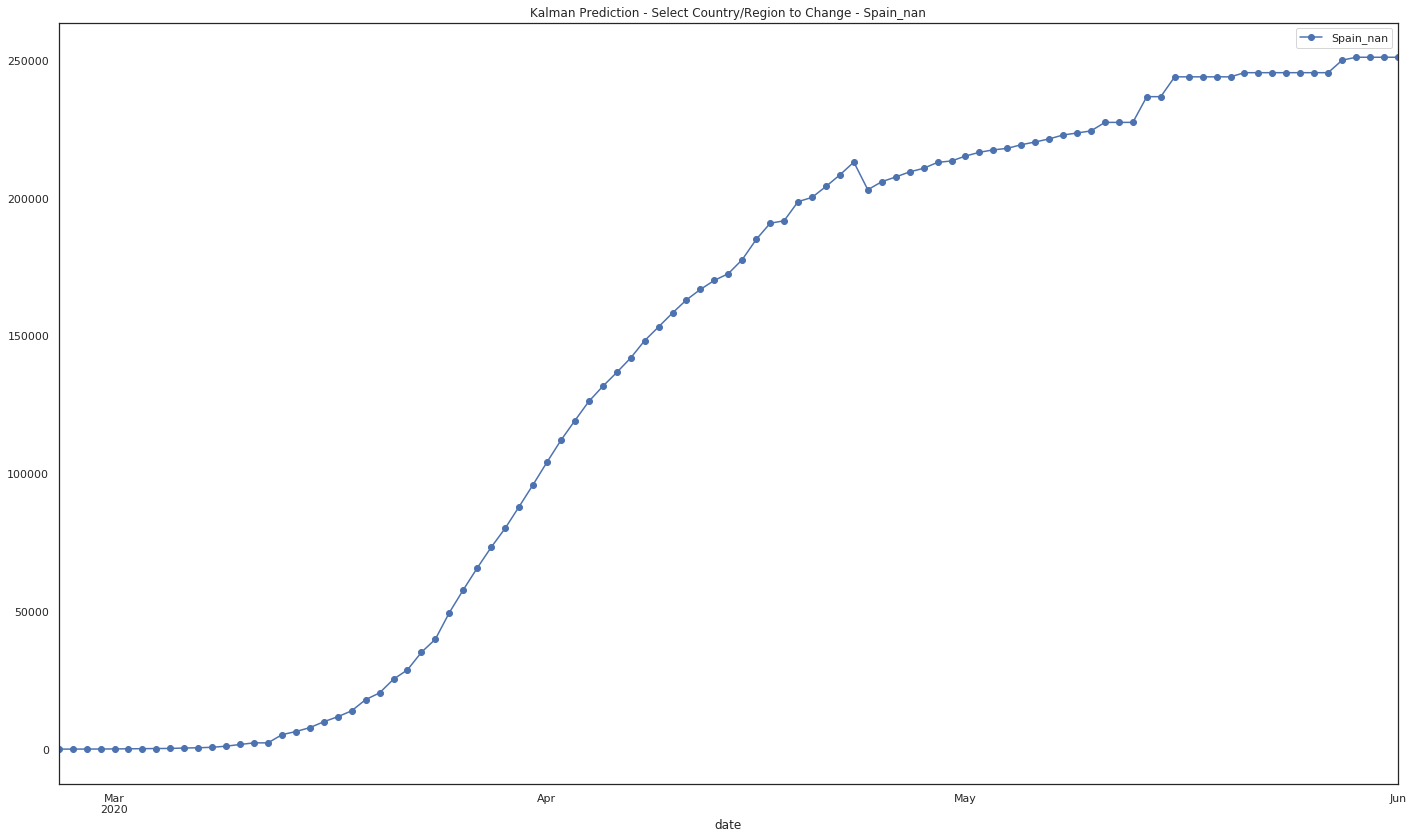

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


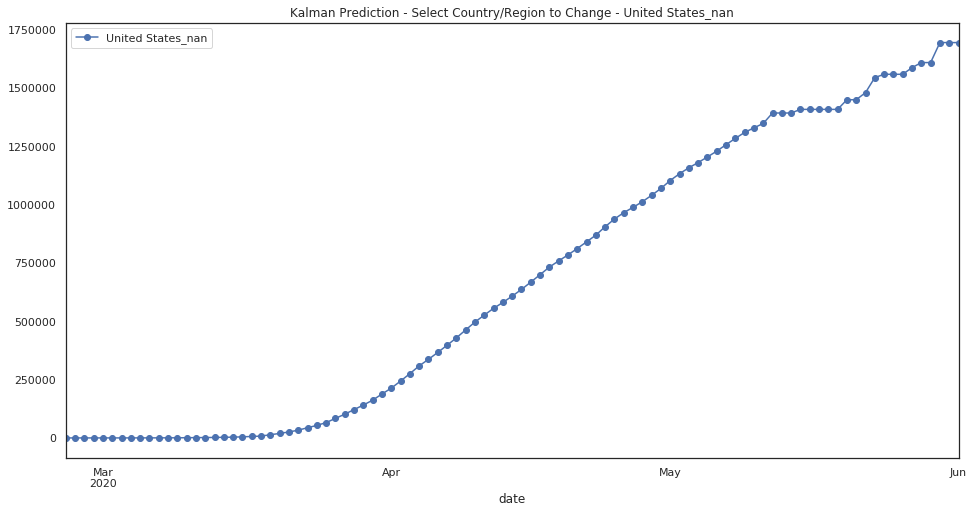

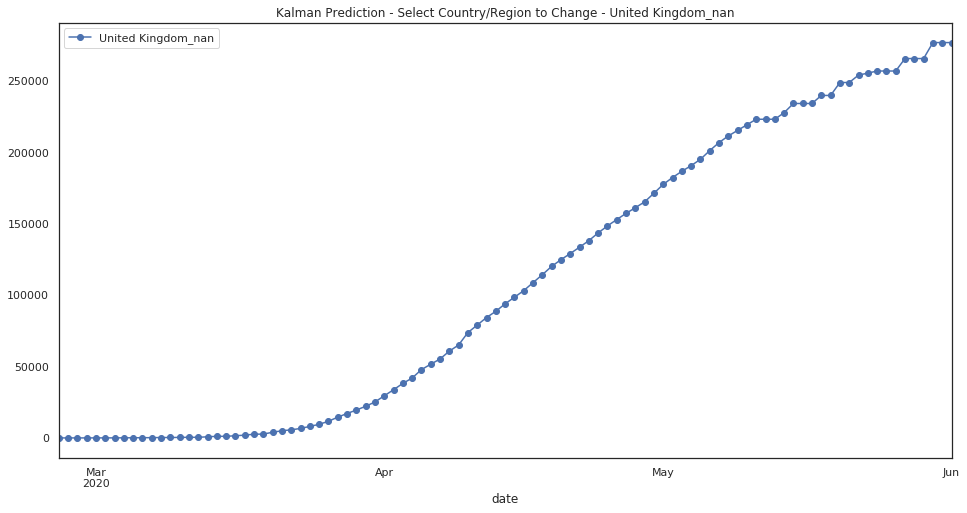

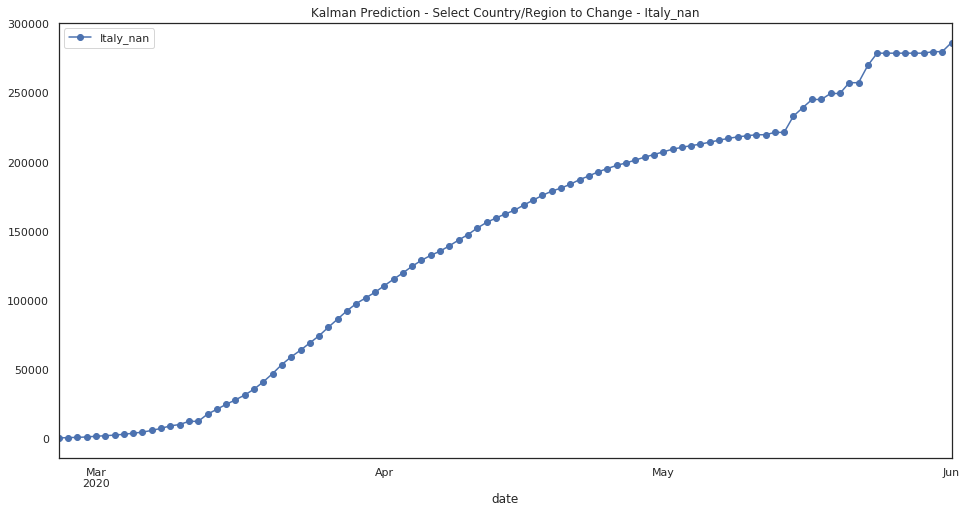

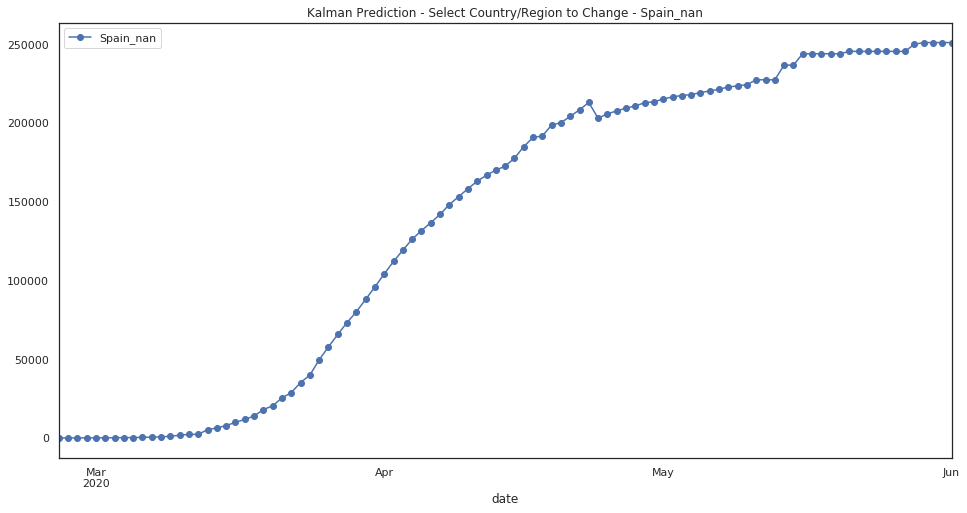

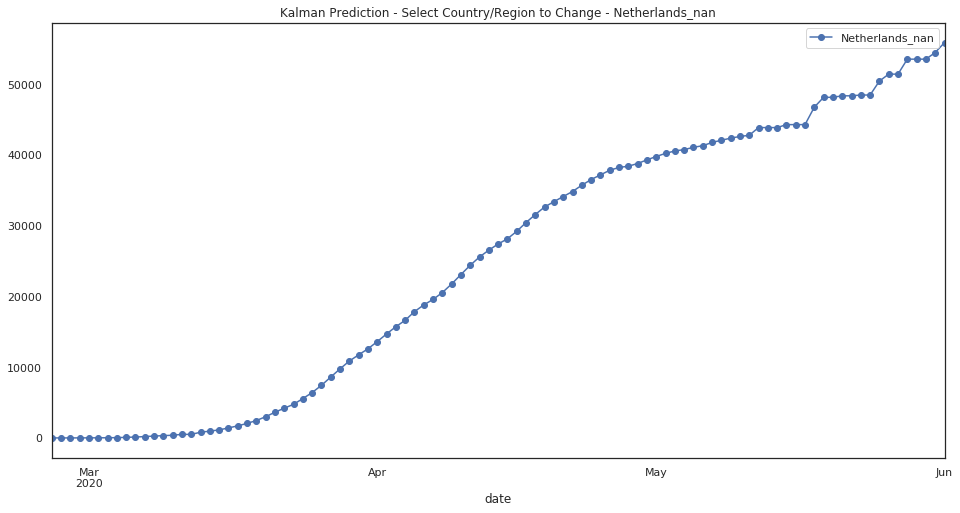

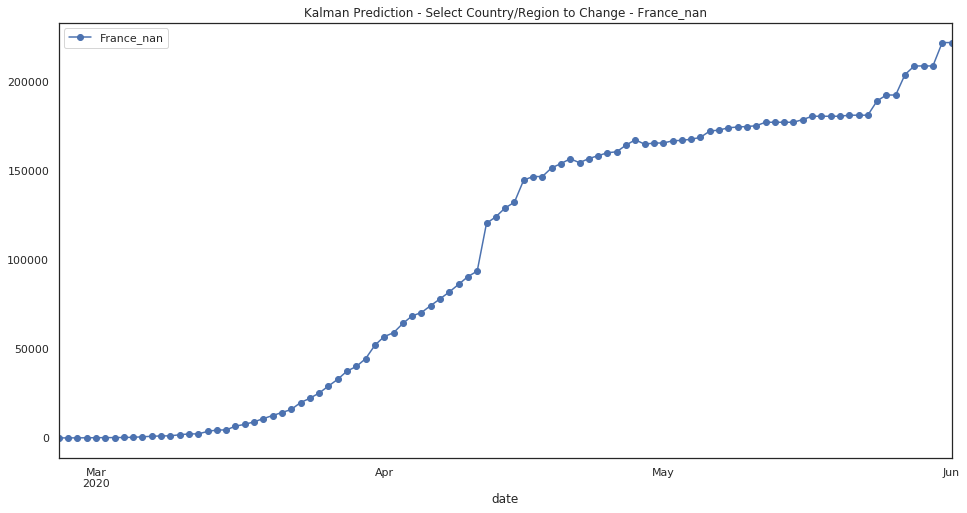

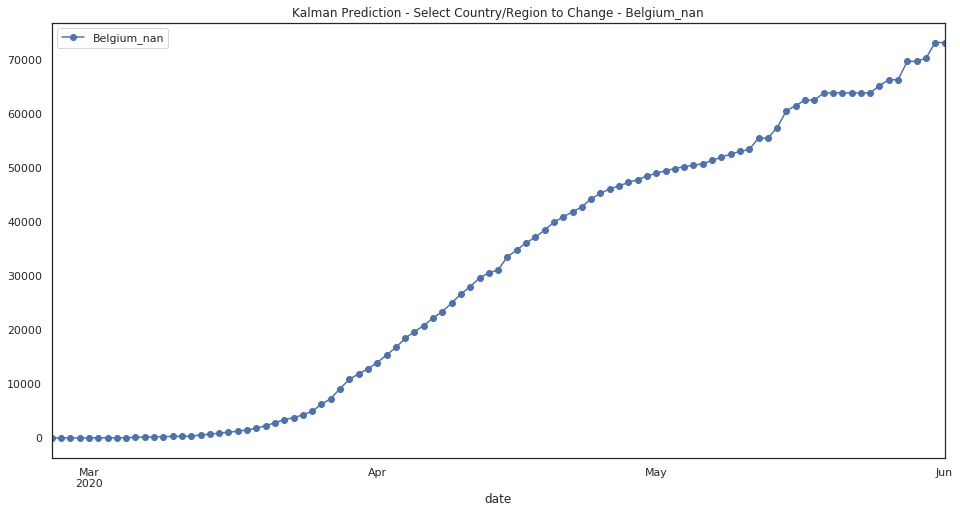

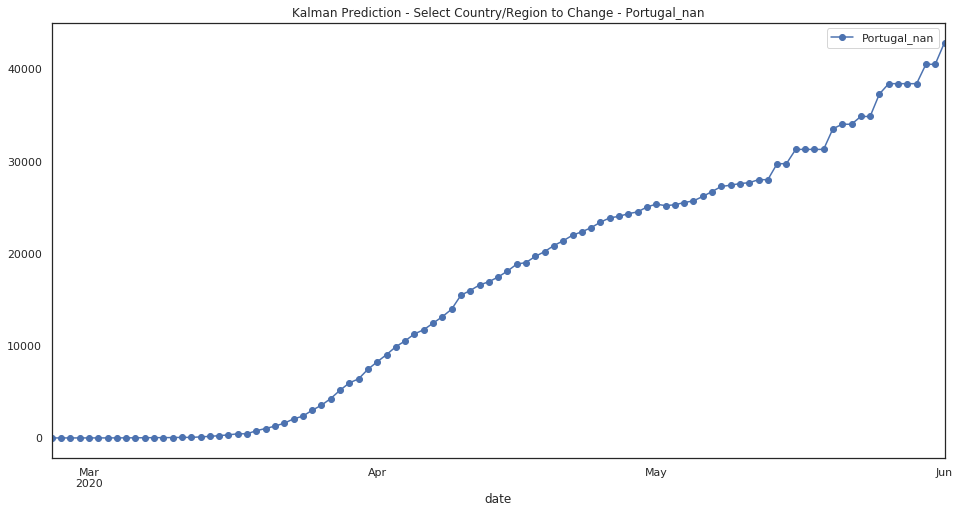

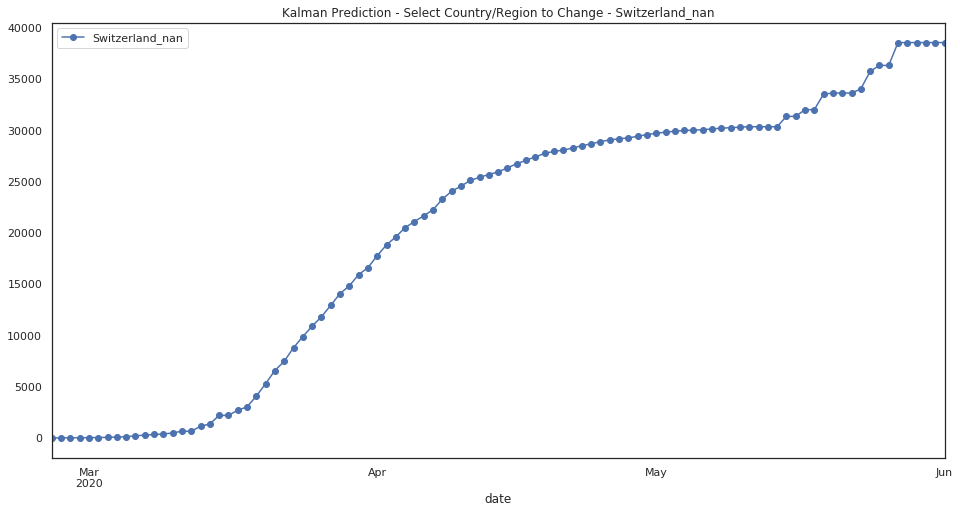

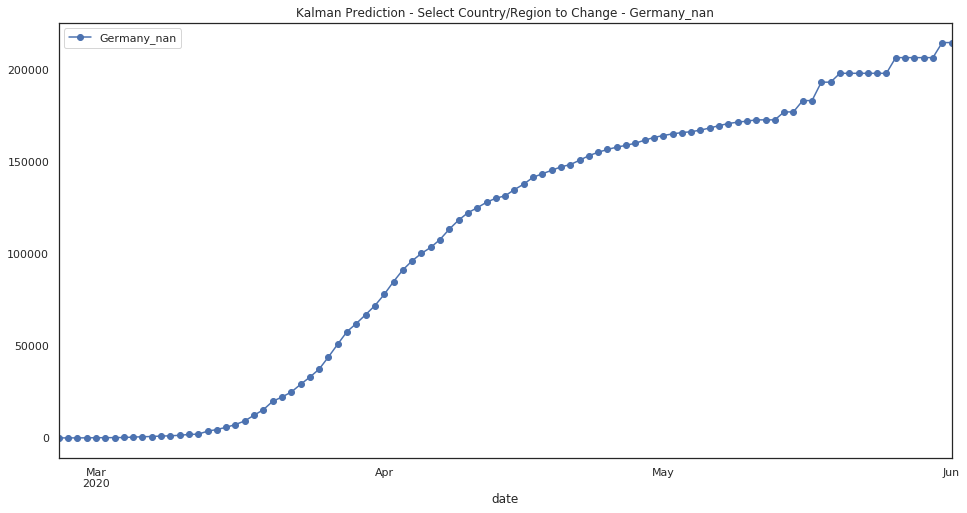

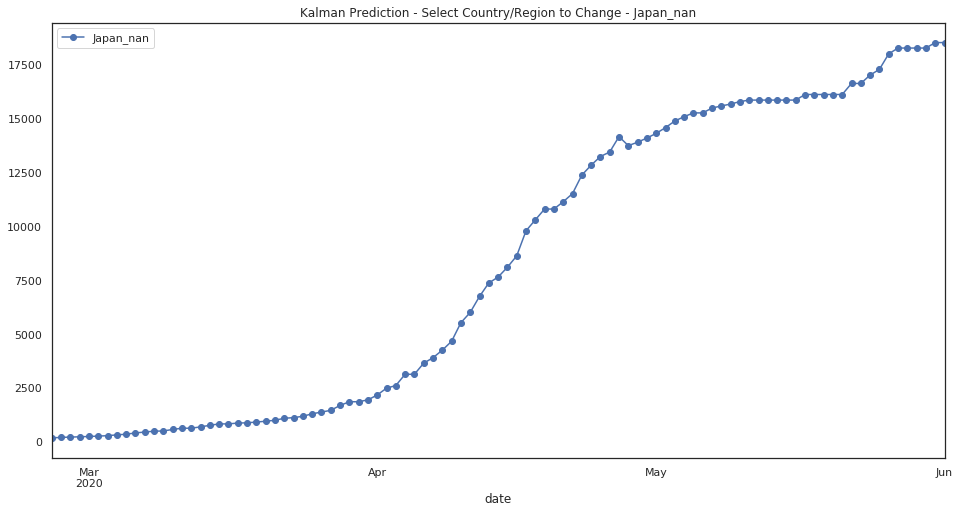

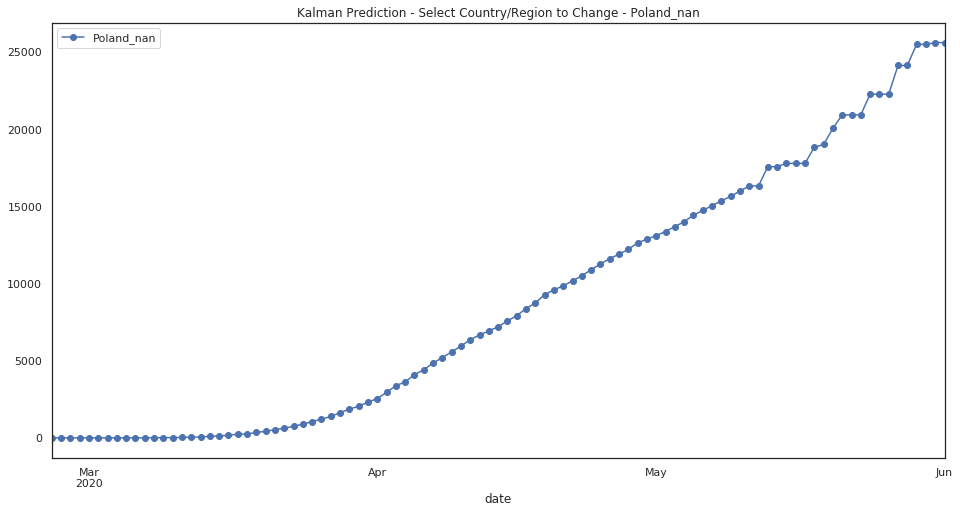

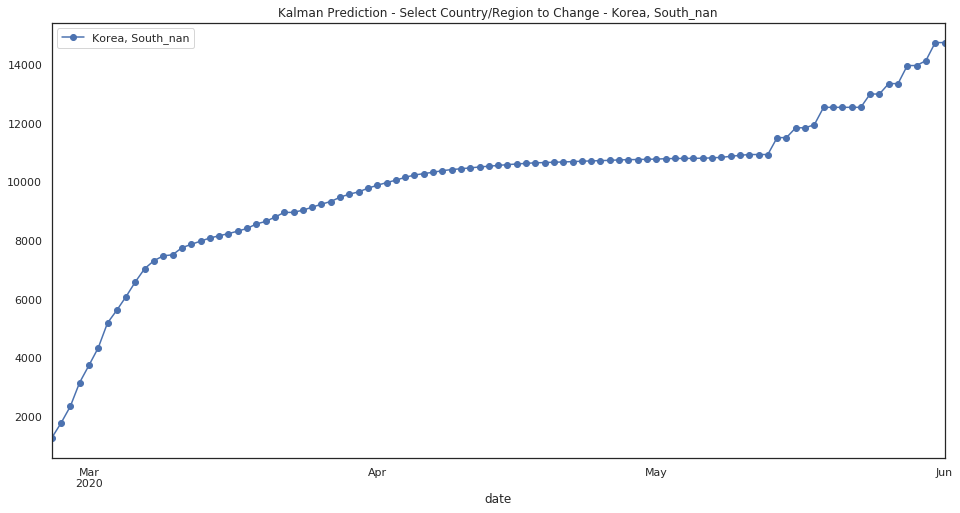

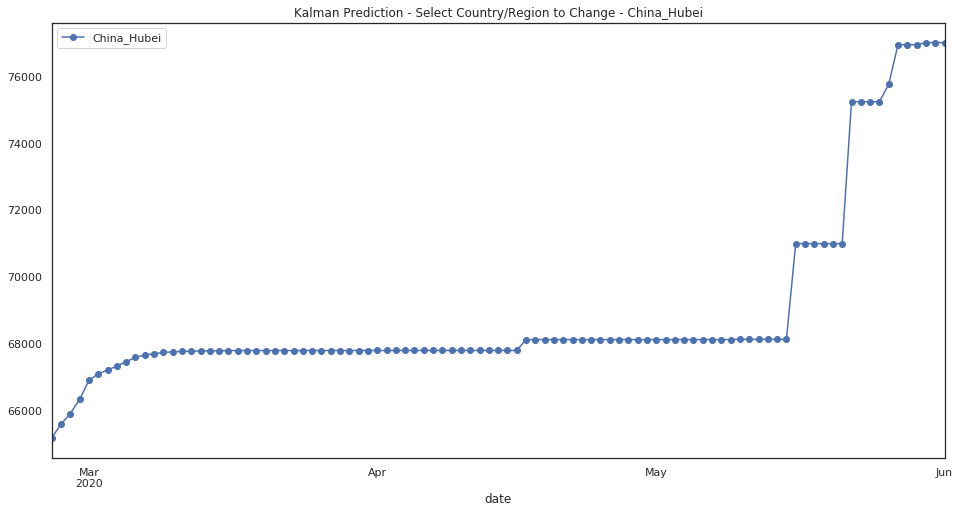

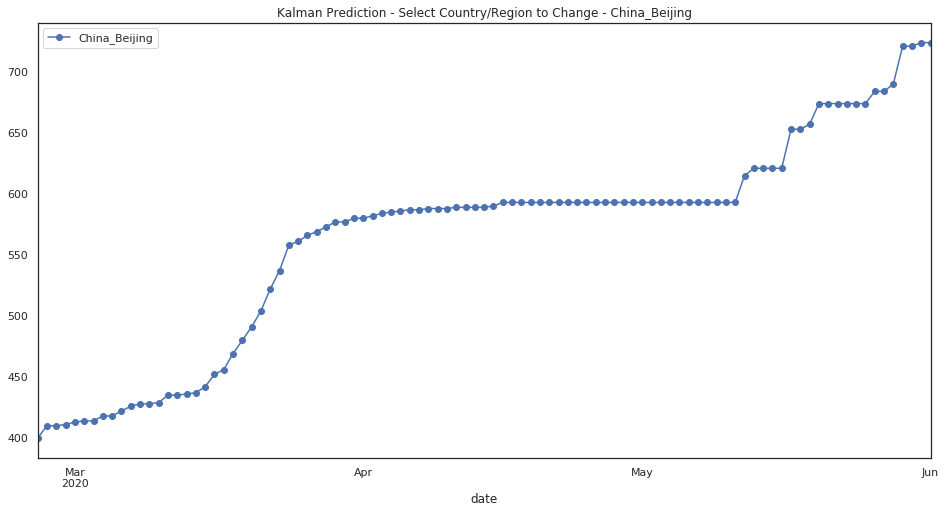

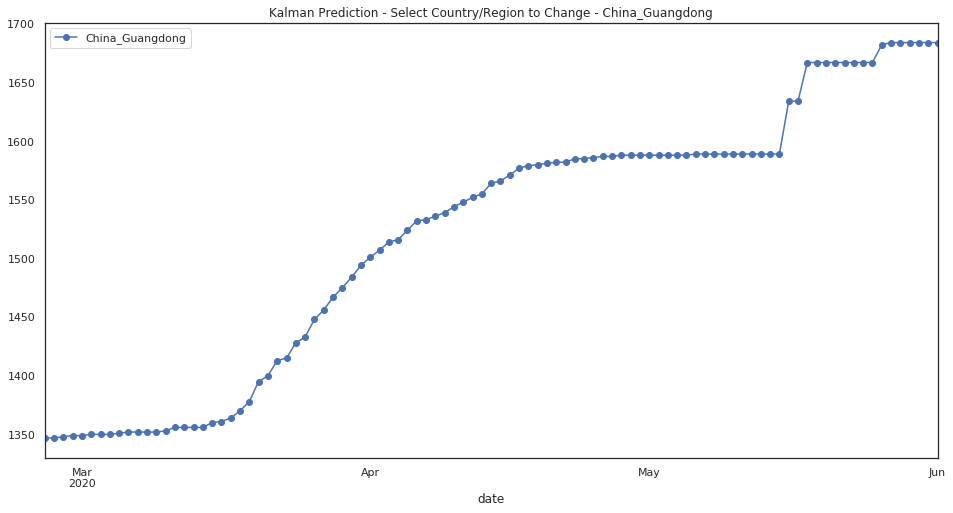

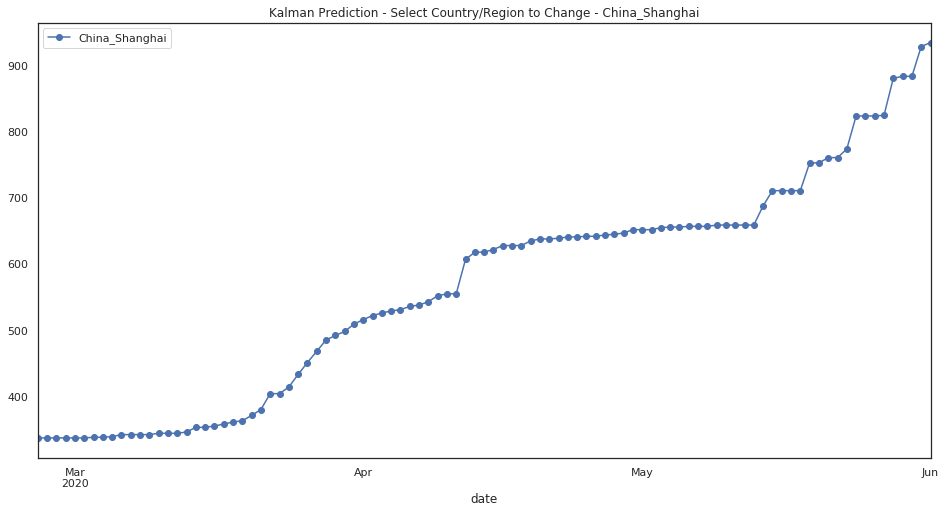

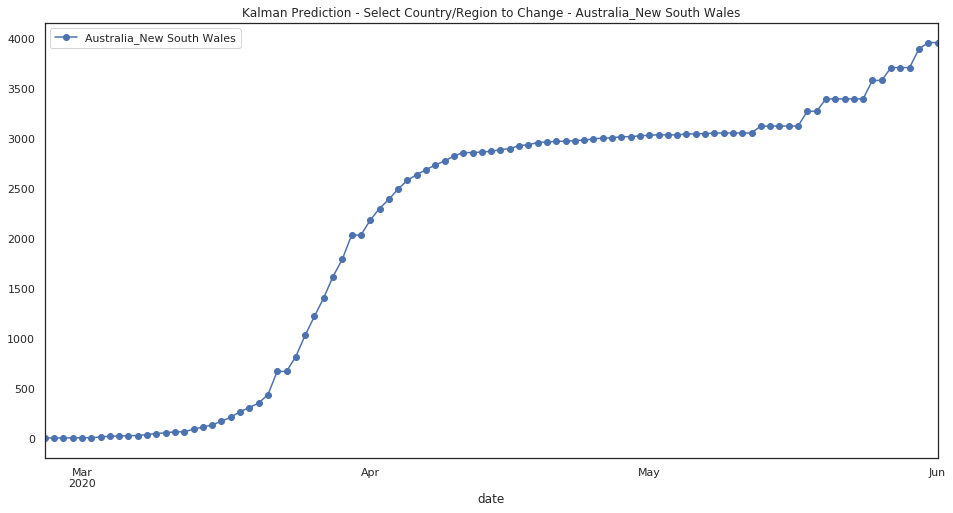

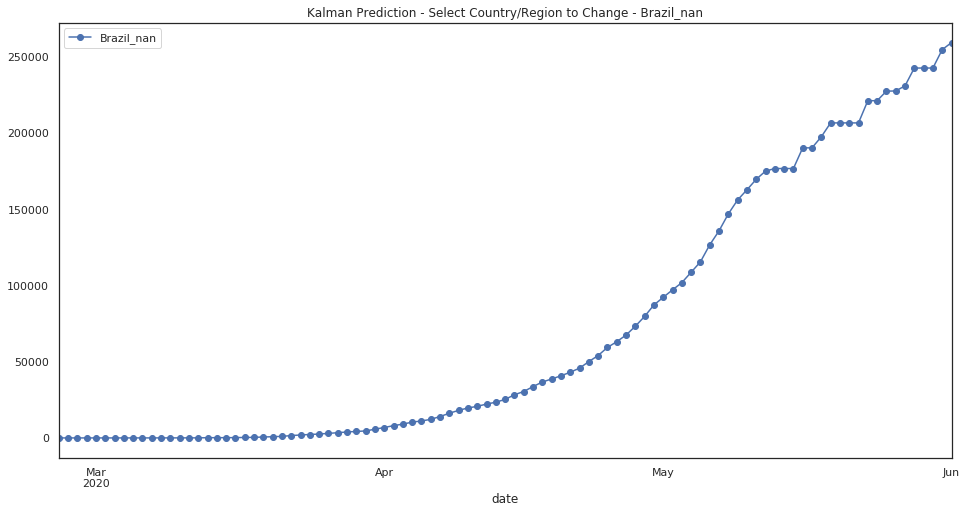

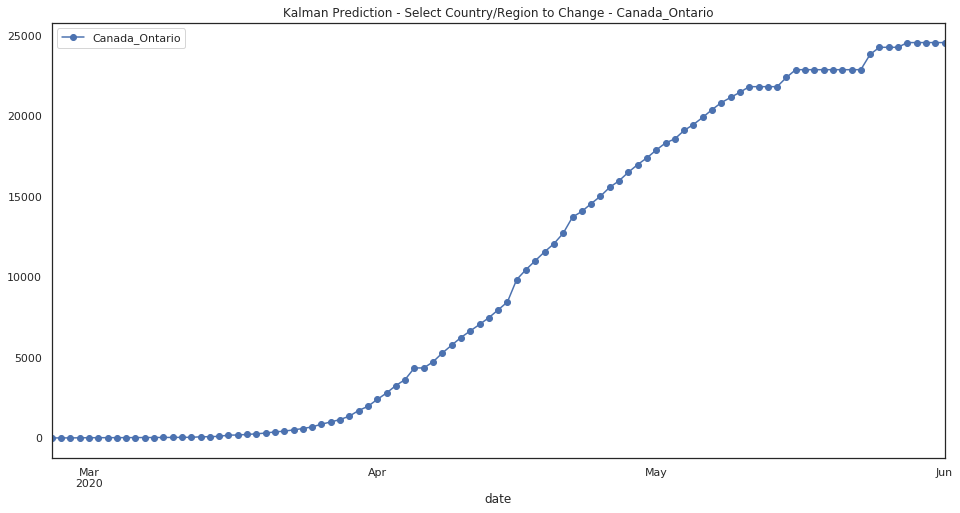

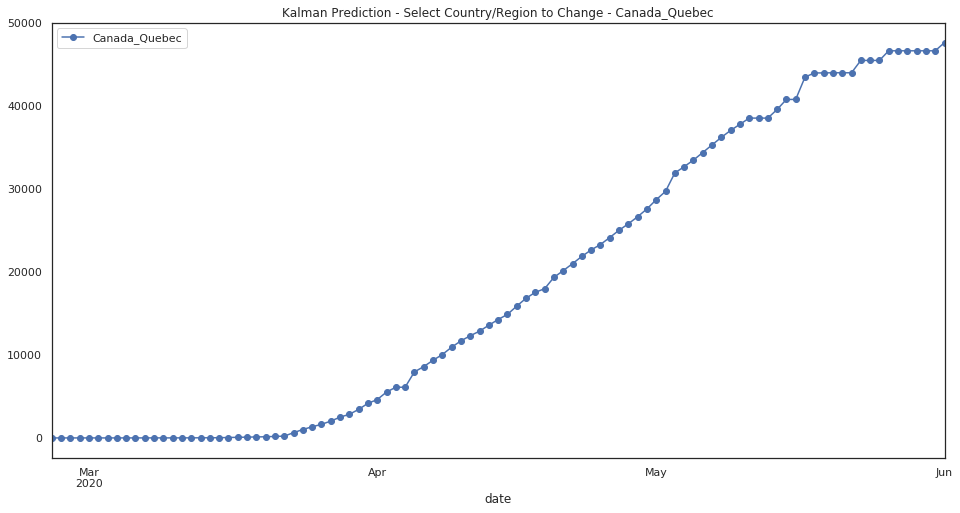

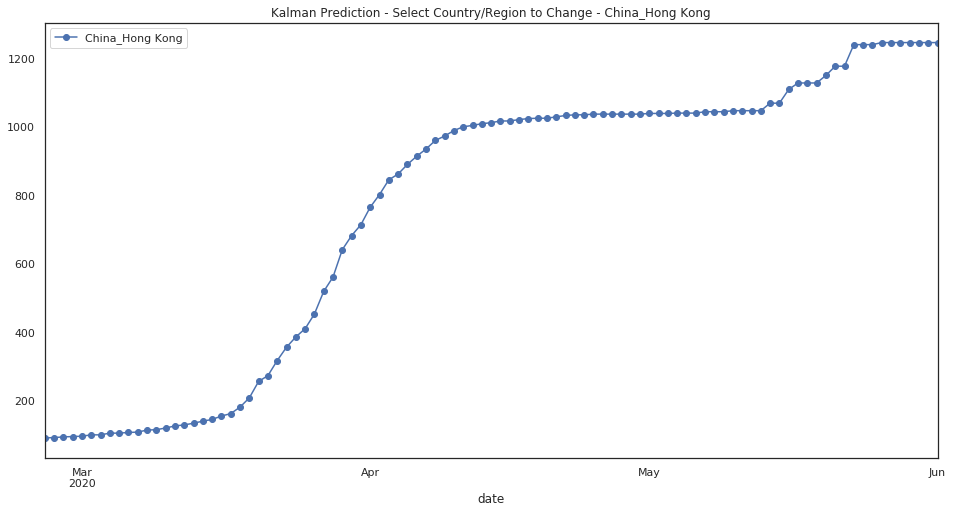

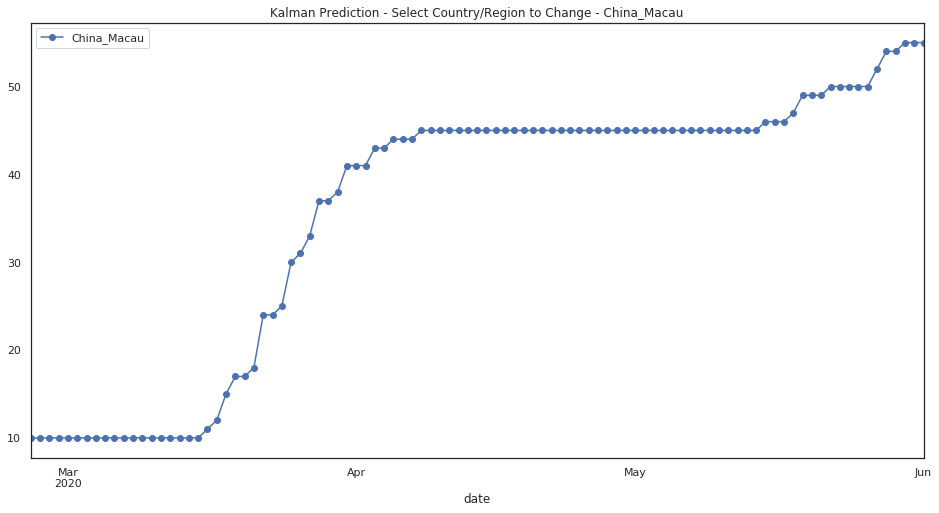

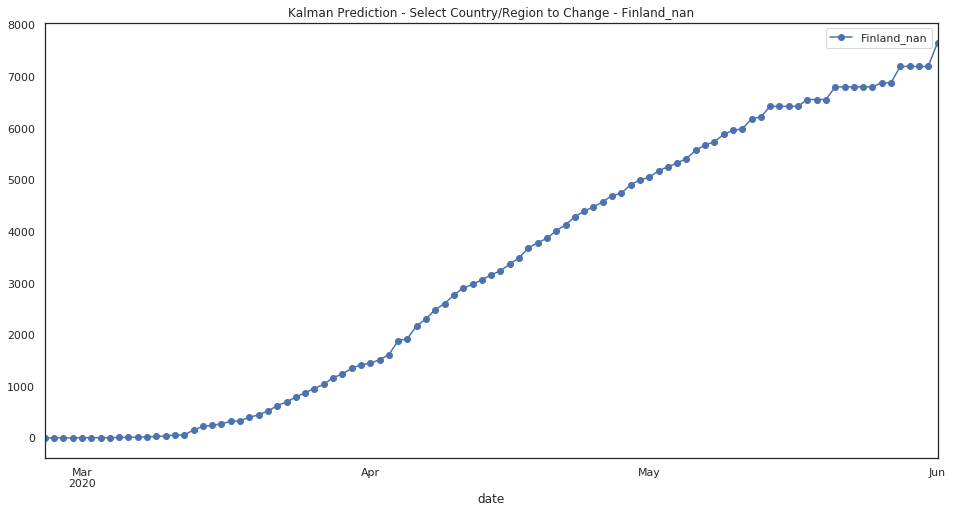

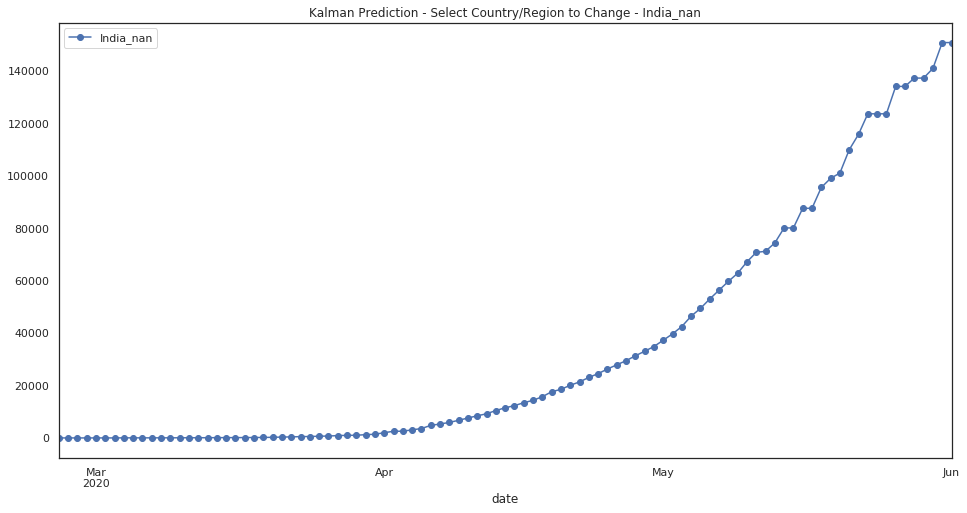

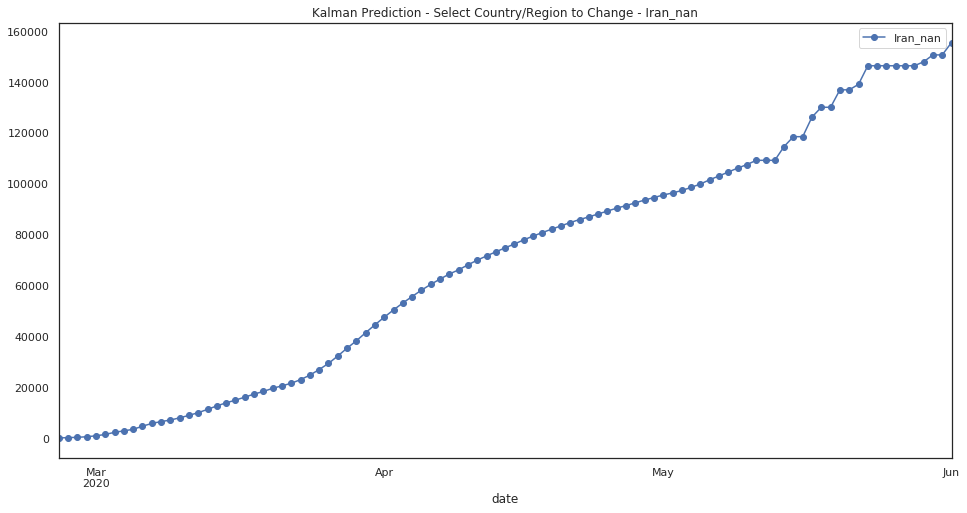

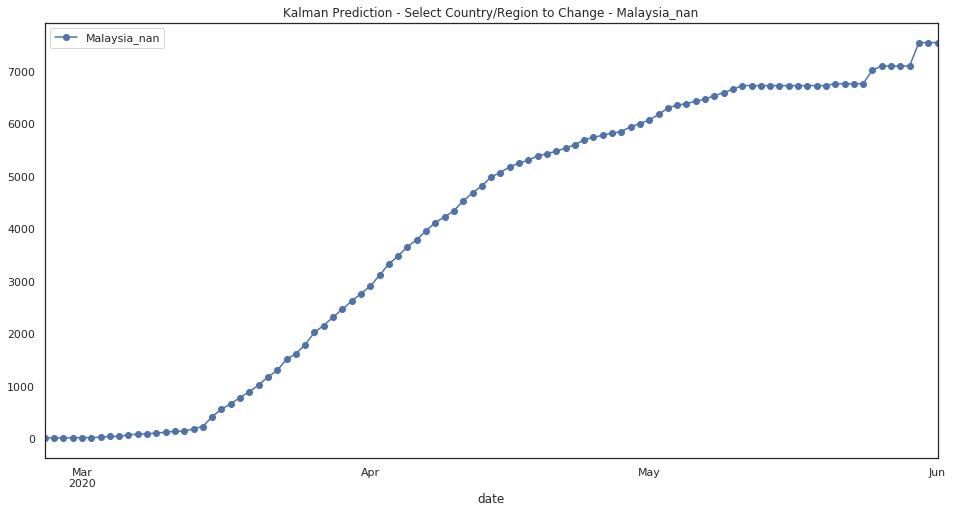

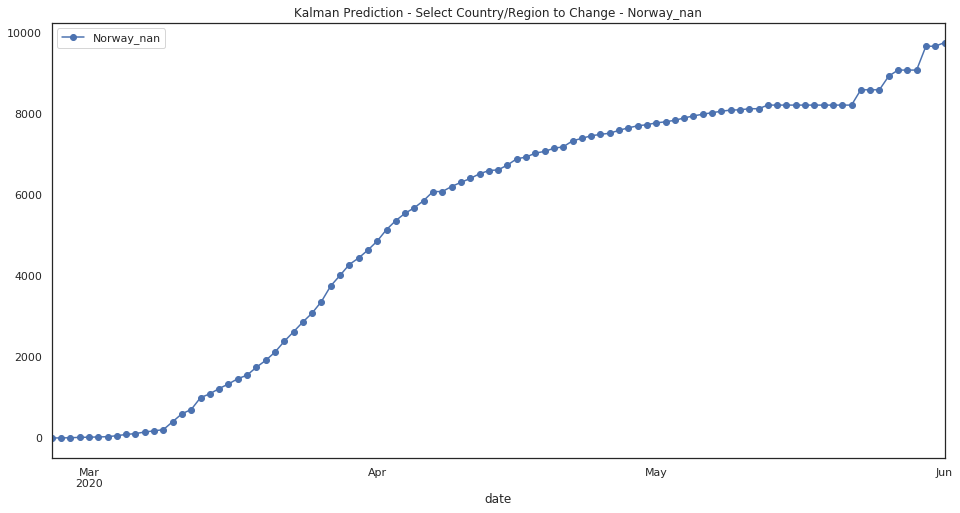

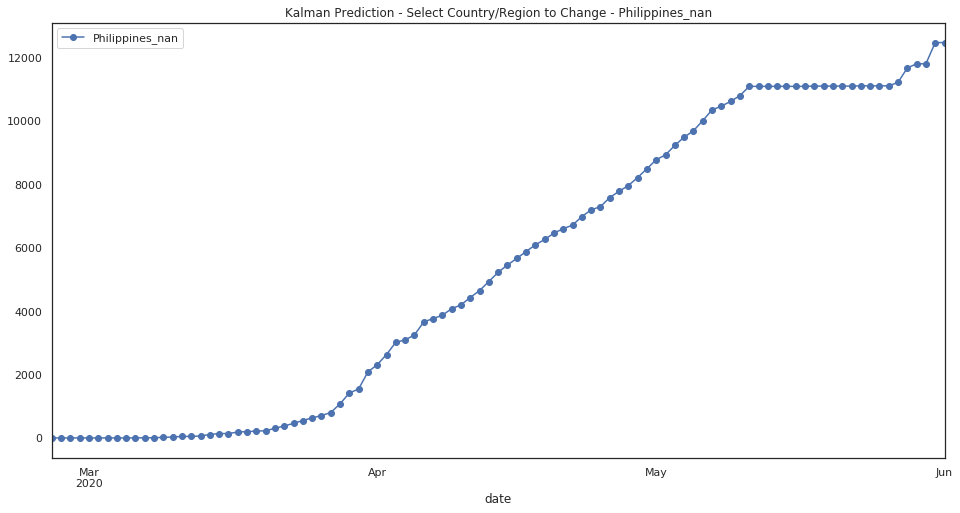

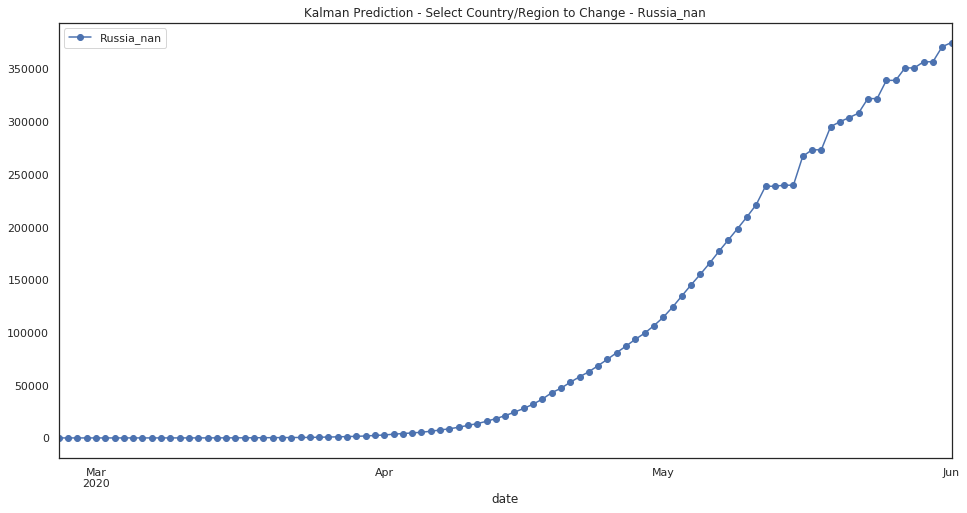

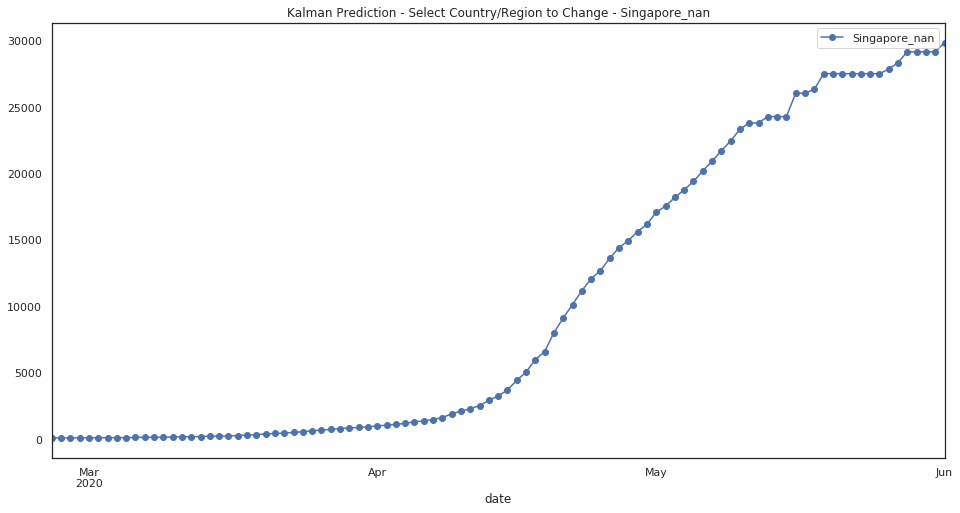

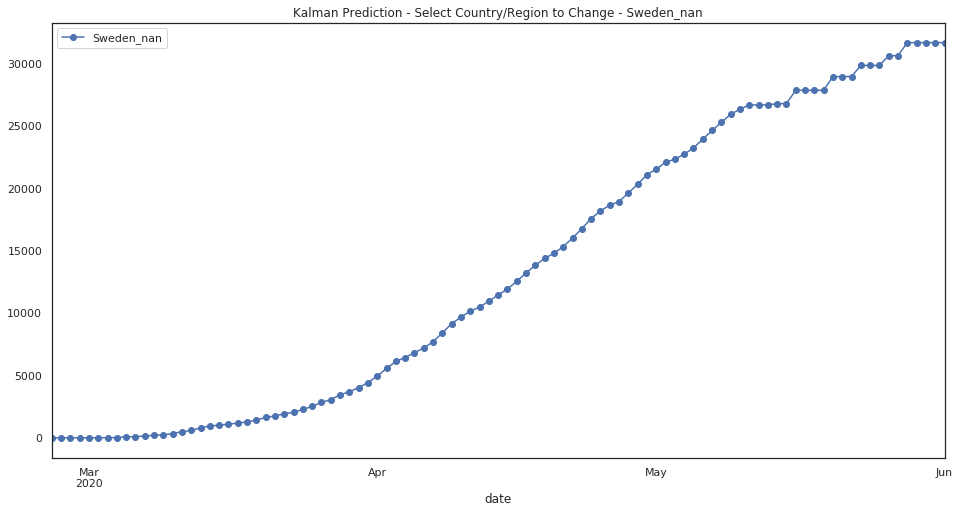

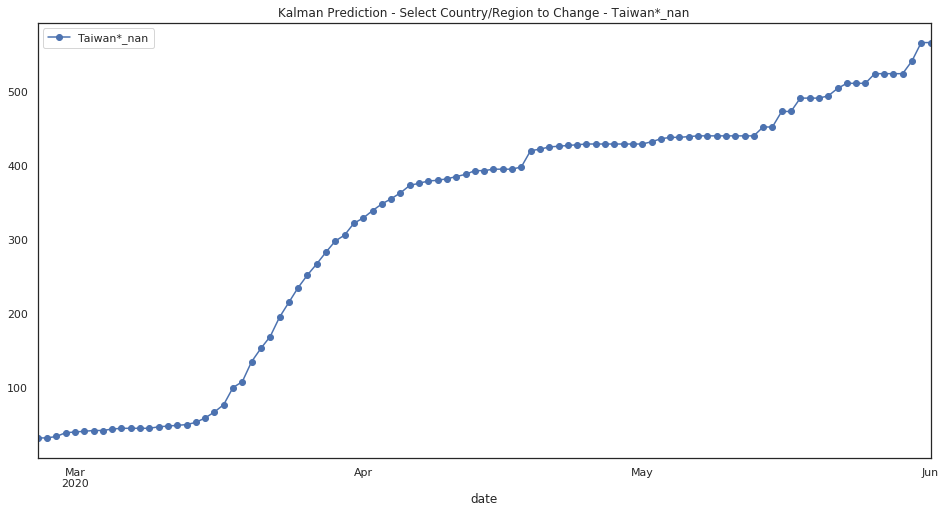

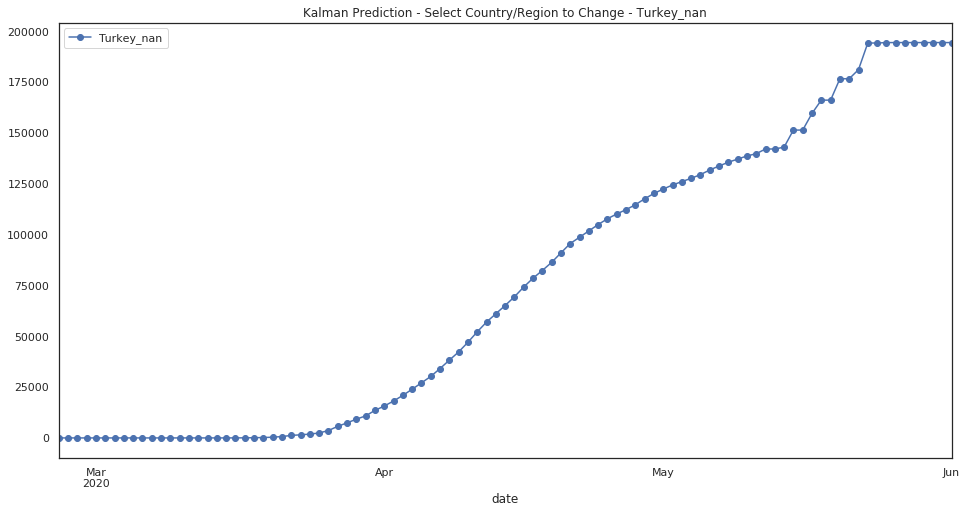

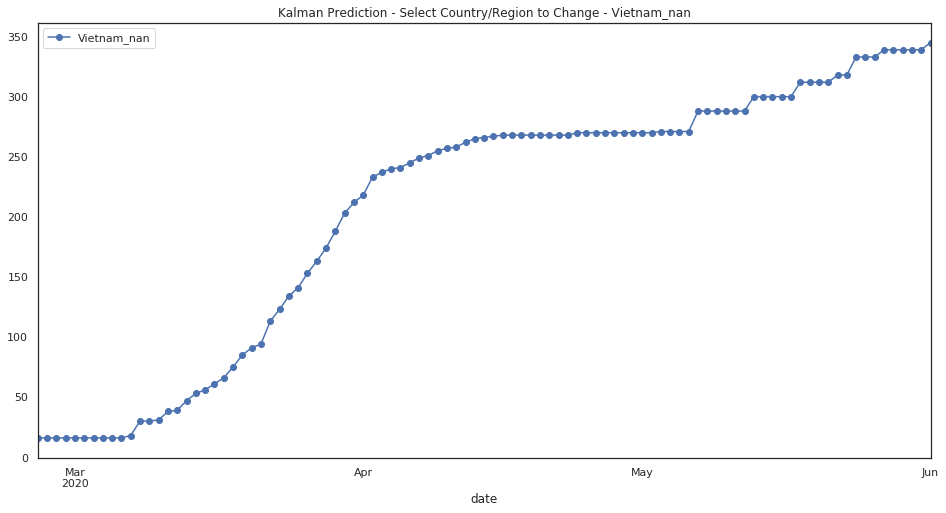

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-06-01 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       1694688.0
Russia_nan                                    NaN        375151.0
Italy_nan                                     NaN        286506.0
United Kingdom_nan                            NaN        276712.0
Brazil_nan                                    NaN        259276.0
Spain_nan                                     NaN        251070.0
France_nan                                    NaN        222213.0
Germany_nan                                   NaN        214499.0
Turkey_nan                                    NaN        194415.0
Iran_nan                                      NaN        155574.0
India_nan                                     NaN        150819.0
Peru_nan                                      NaN        140884.0
China_Hubei                                   NaN         77008.0
Saudi Arabia_nan                              NaN         73629.0
Belgium_nan                                   NaN         73248.0
Chile_nan                                     NaN         56396.0
Netherlands_nan                               NaN         55900.0
Mexico_nan                                    NaN         52323.0
Pakistan_nan                                  NaN         49758.0
Canada_Quebec                                 NaN         47565.0
Portugal_nan                                  NaN         42870.0
Switzerland_nan                               NaN         38551.0
Belarus_nan                                   NaN         36663.0
Ecuador_nan                                   NaN         34706.0
Qatar_nan                                     NaN         33515.0
Sweden_nan                                    NaN         31662.0
Singapore_nan                                 NaN         29870.0
Ireland_nan                                   NaN         28865.0
Austria_nan                                   NaN         25711.0
Poland_nan                                    NaN         25616.0
...                                           ...             ...
France_New Caledonia                          NaN            20.0
Dominica_nan                                  NaN            20.0
Netherlands_Curacao                           NaN            20.0
Belize_nan                                    NaN            20.0
Nicaragua_nan                                 NaN            19.0
Saint Vincent and the Grenadines_nan          NaN            19.0
Burundi_nan                                   NaN            18.0
Holy See_nan                                  NaN            18.0
Canada_Grand Princess                         NaN            17.0
United Kingdom_Turks and Caicos Islands       NaN            16.0
United Kingdom_Falkland Islands (Malvinas)    NaN            16.0
Canada_Yukon                                  NaN            13.0
Bhutan_nan                                    NaN            12.0
Denmark_Greenland                             NaN            11.0
United Kingdom_Montserrat                     NaN            11.0
Seychelles_nan                                NaN            11.0
Suriname_nan                                  NaN            10.0
MS Zaandam_nan                                NaN             9.0
Mauritania_nan                                NaN             8.0
Papua New Guinea_nan                          NaN             8.0
United Kingdom_British Virgin Islands         NaN             7.0
France_Saint Barthelemy                       NaN             6.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN             6.0
Western Sahara_nan                            NaN             6.0
Canada_Northwest Territories                  NaN             5.0
United Kingdom_Anguilla                       NaN             3.0
France_Saint Pierre and Miquelon              NaN             1.0
Canada_Diamond Princess                       NaN             1.0
China_Tibet                                   NaN             1.0
Canada_Recovered      

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [82]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [83]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [84]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [85]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-26             45.0         15.0         86.0         15.0   
2020-02-27             89.0         15.0        104.0         15.0   
2020-02-28             29.0         15.0         62.0         15.0   
2020-02-29             32.0         15.0         65.0         15.0   
2020-03-01             39.0         15.0         65.0         15.0   
2020-03-02             43.0         15.0         66.0         15.0   
2020-03-03             42.0         15.0         33.0         16.0   
2020-03-04             30.0         15.0         72.0          1.0   
2020-03-05             31.0         15.0        108.0          1.0   
2020-03-06             33.0         15.0        115.0          1.0   
2020-03-07             42.0         15.0         96.0          1.0   
2020-03-08             48.0         15.0         96.0          1.0   
2020-03-09              4.0         16.0        106.0          1.0   
2020-03-10             52.0         25.0         83.0          1.0   
2020-03-11             65.0         10.0         83.0          1.0   
2020-03-12             53.0         15.0         87.0          1.0   
2020-03-13             64.0         51.0         90.0          1.0   
2020-03-14             67.0         41.0        101.0          1.0   
2020-03-15             70.0         46.0        116.0          1.0   
2020-03-16             72.0         49.0        126.0          2.0   
2020-03-17             80.0         87.0        132.0         19.0   
2020-03-18             78.0         64.0        144.0         39.0   
2020-03-19             75.0         67.0        161.0        208.0   
2020-03-20             76.0         71.0        166.0        216.0   
2020-03-21             77.0         77.0        201.0        191.0   
2020-03-22             89.0         89.0        290.0        229.0   
2020-03-23             96.0        108.0        340.0        288.0   
2020-03-24            124.0        129.0        354.0        251.0   
2020-03-25            156.0        155.0        388.0        206.0   
2020-03-26            156.0        184.0        444.0        233.0   
...                     ...          ...          ...          ...   
2020-05-04           3037.0        797.0       4770.0        755.0   
2020-05-05           3308.0        815.0       4953.0        757.0   
2020-05-06           3616.0        835.0       5129.0        756.0   
2020-05-07           3641.0        843.0       5288.0        756.0   
2020-05-08           3856.0        850.0       5494.0        757.0   
2020-05-09           4115.0        853.0       5679.0        758.0   
2020-05-10           4493.0        862.0       5848.0        761.0   
2020-05-11           4893.0        872.0       5995.0        760.0   
2020-05-12           5008.0        872.0       6054.0        760.0   
2020-05-13           5094.0        883.0       6321.0        784.0   
2020-05-14           5290.0        924.0       6728.0        813.0   
2020-05-15           5349.0        945.0       6374.0        790.0   
2020-05-16           5249.0        957.0       6395.0        790.0   
2020-05-17           5658.0        952.0       6371.0        786.0   
2020-05-18           6240.0        960.0       6465.0        786.0   
2020-05-19           6107.0        981.0       6587.0        787.0   
2020-05-20           6444.0        983.0       6718.0        788.0   
2020-05-21           6158.0       1041.0       7238.0        814.0   
2020-05-22           6227.0       1079.0       7292.0        842.0   
2020-05-23           6298.0       1085.0       7125.0        833.0   
2020-05-24           6283.0       1110.0       7131.0        848.0   
2020-05-25           6391.0       1166.0       7086.0        832.0   
2020-05-26           6475.0       1166.0       7360.0        867.0   
2020-05-27           6437.0       1225.0       7850.0        907.0   
2020-05-28

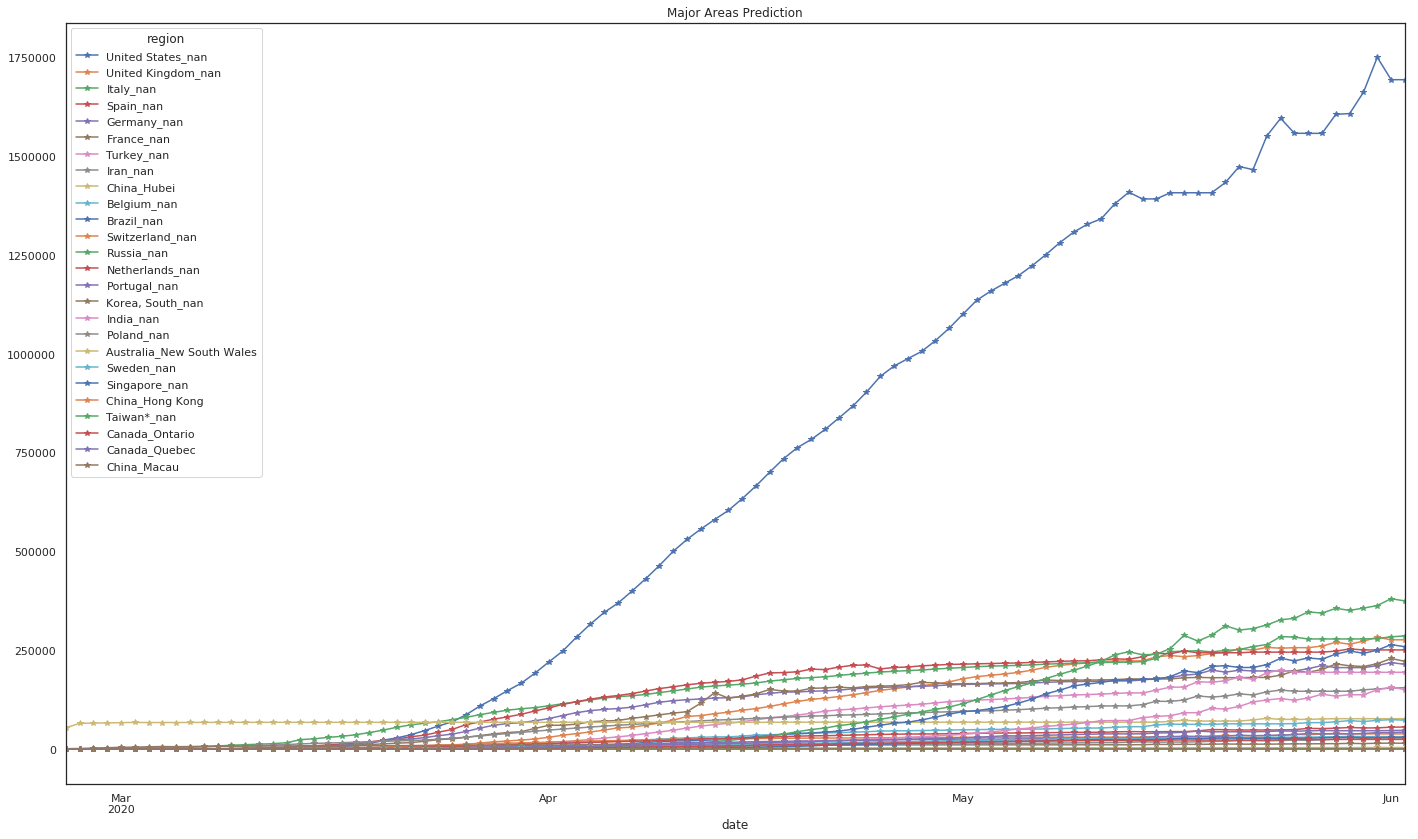

In [86]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Canada_Ontario',
        'Canada_Quebec',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

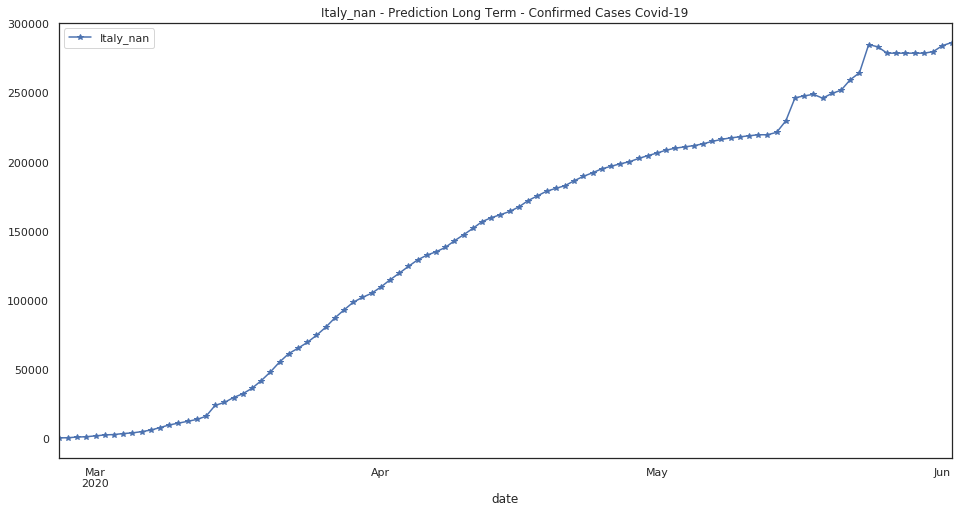

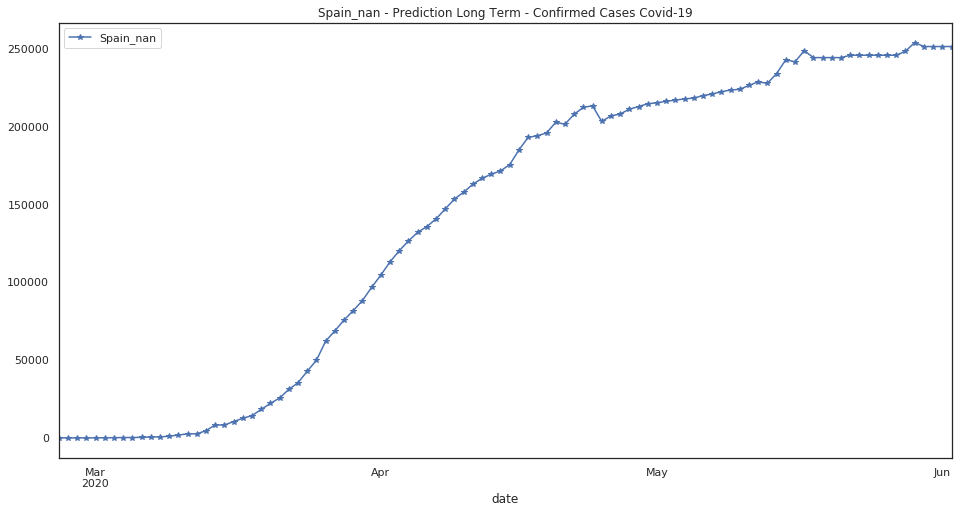

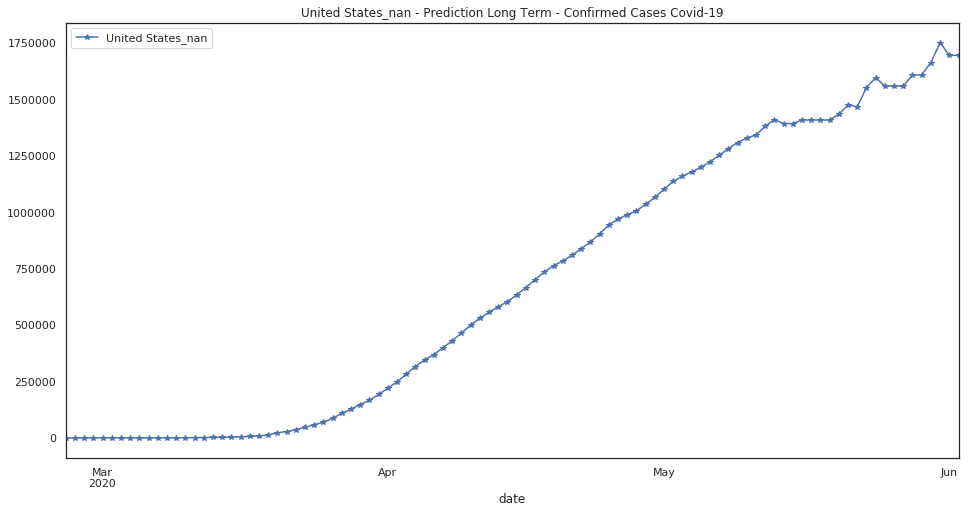

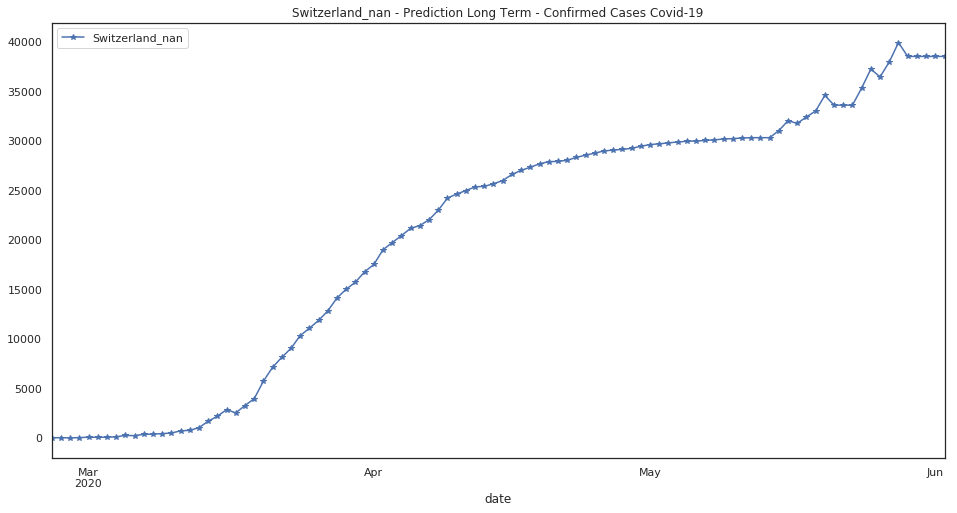

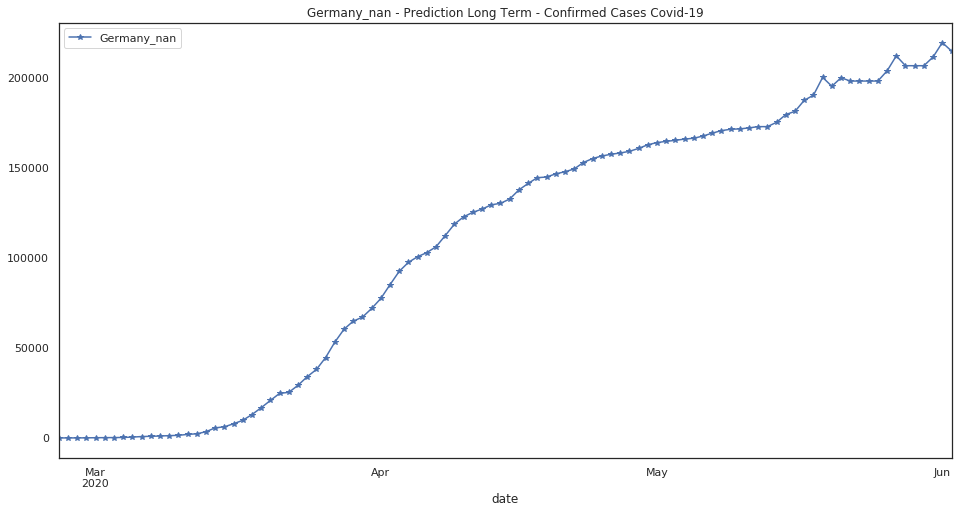

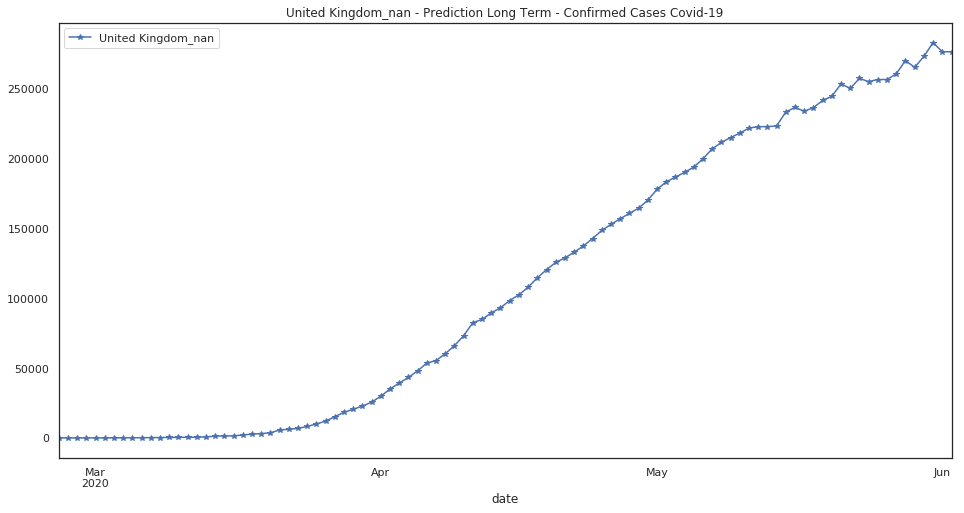

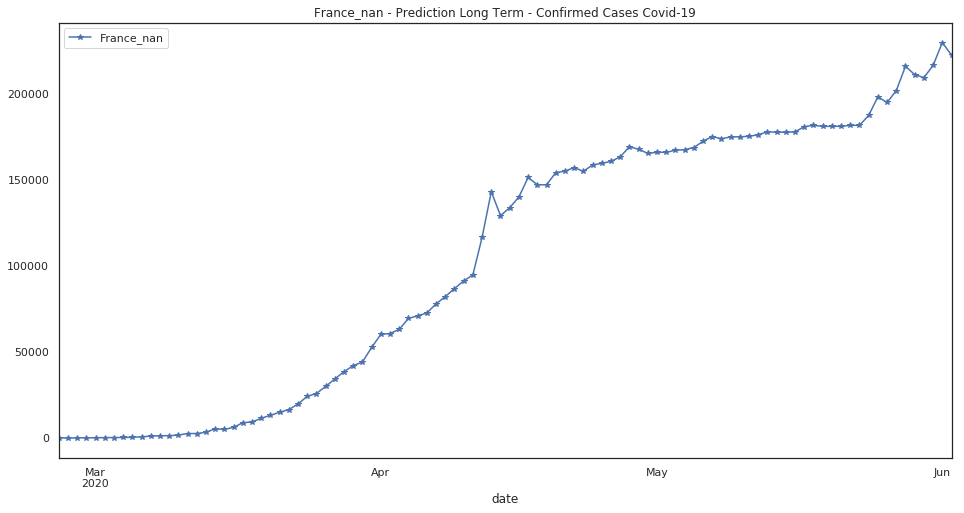

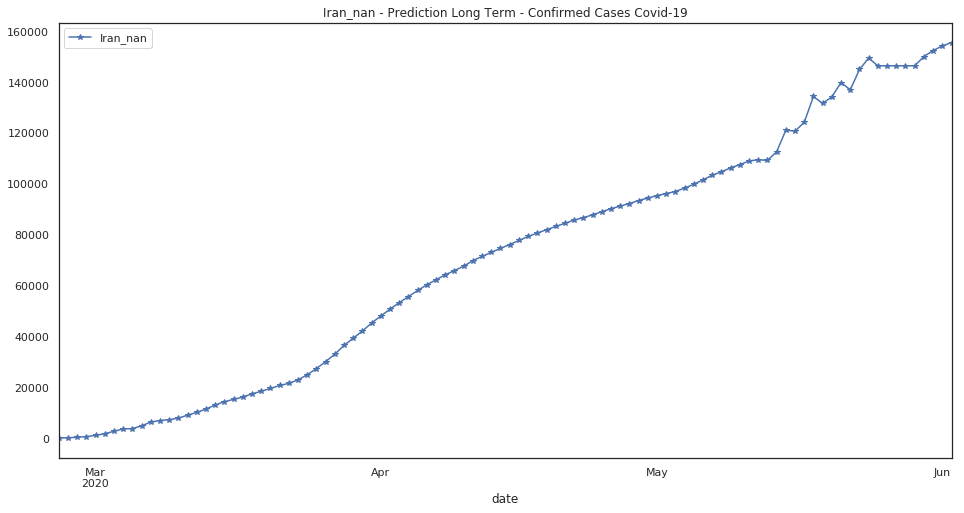

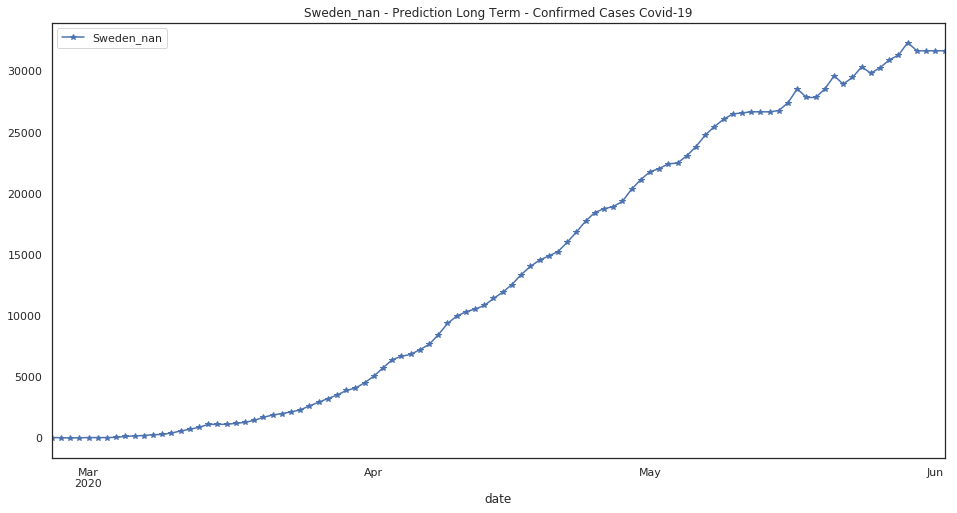

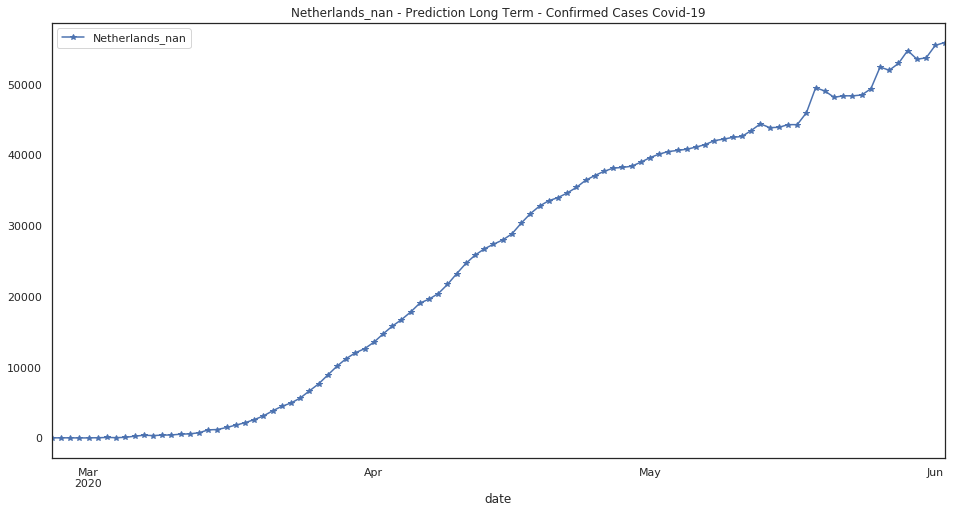

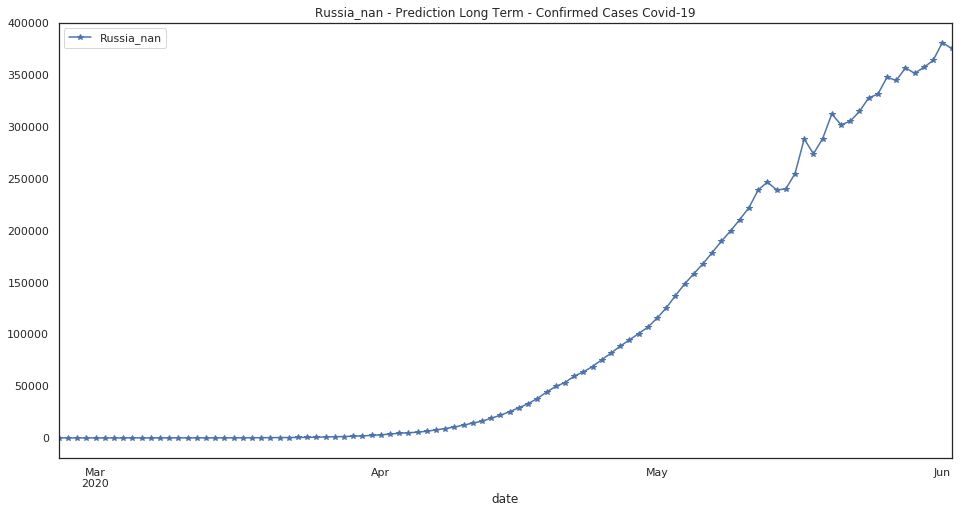

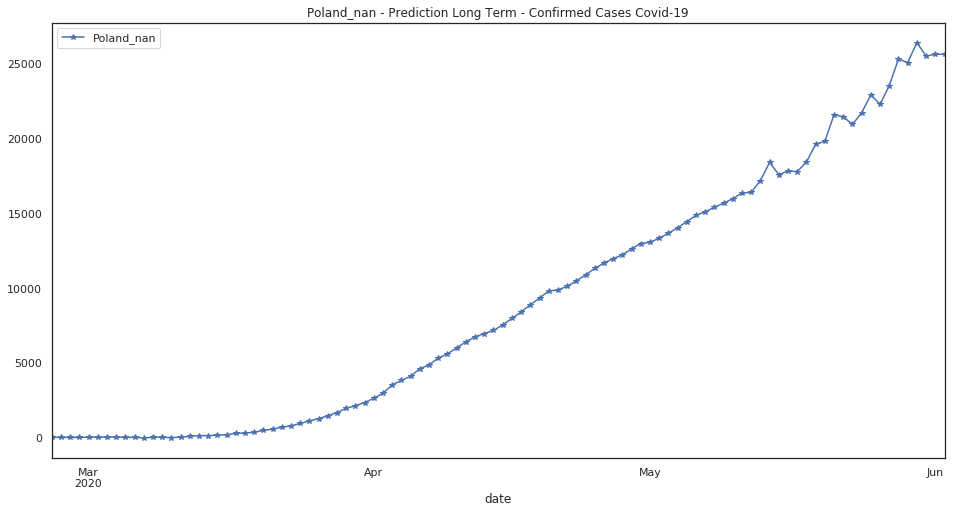

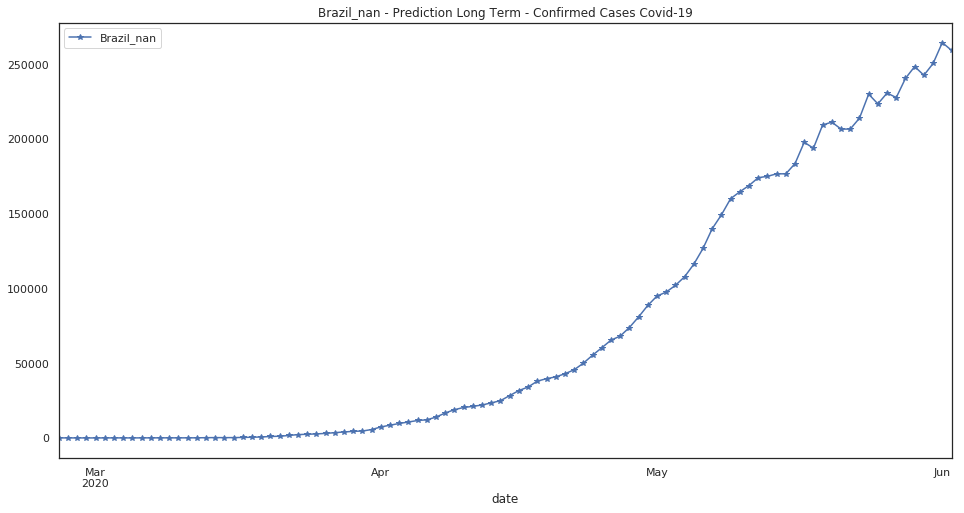

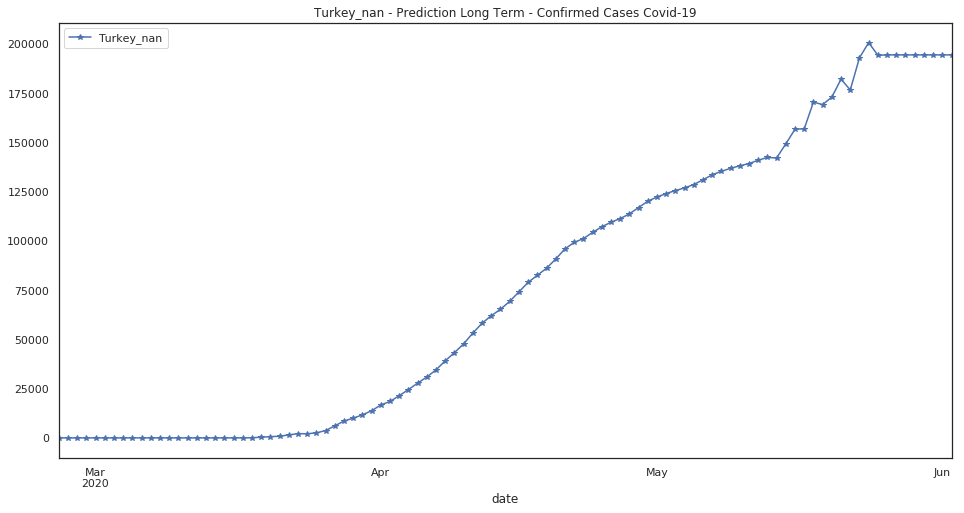

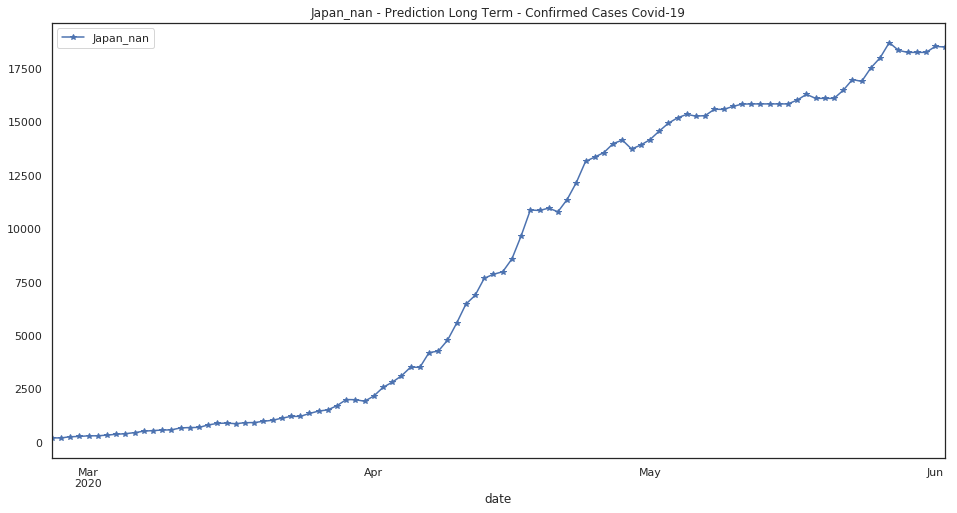

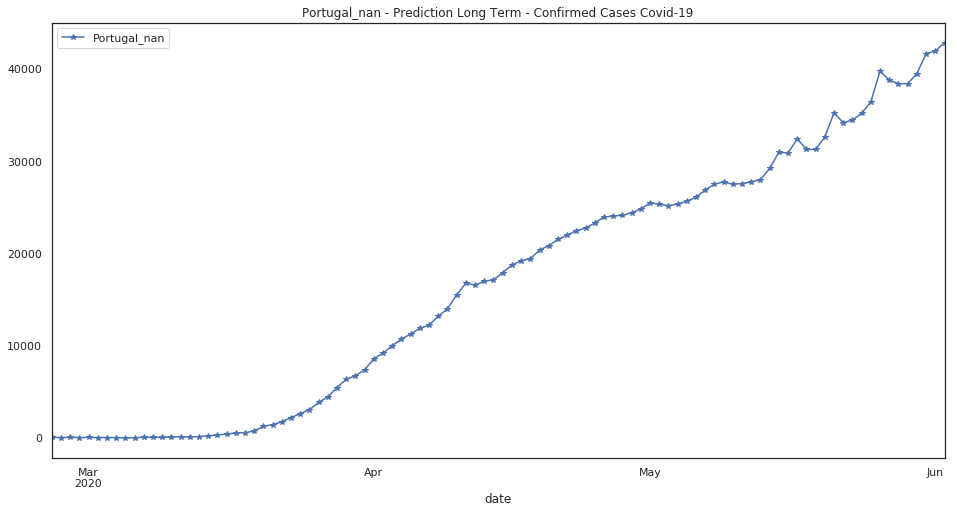

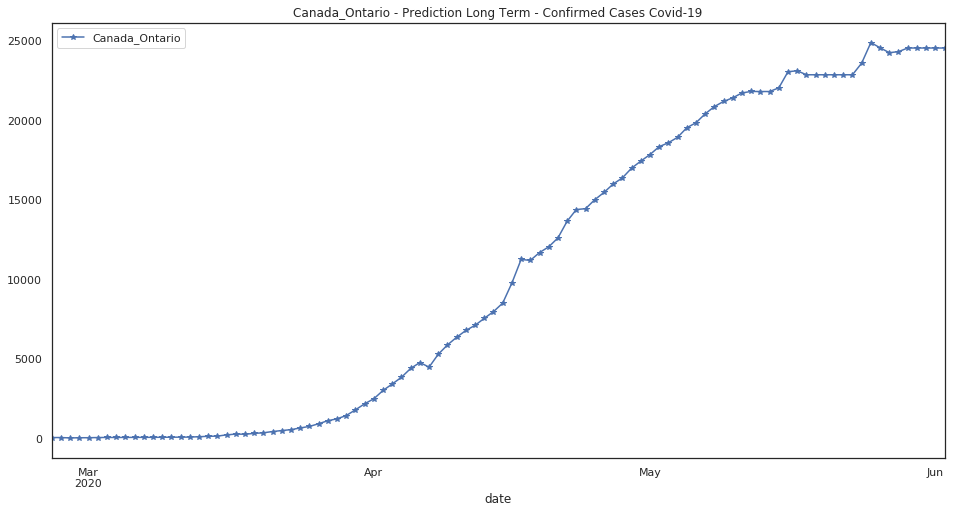

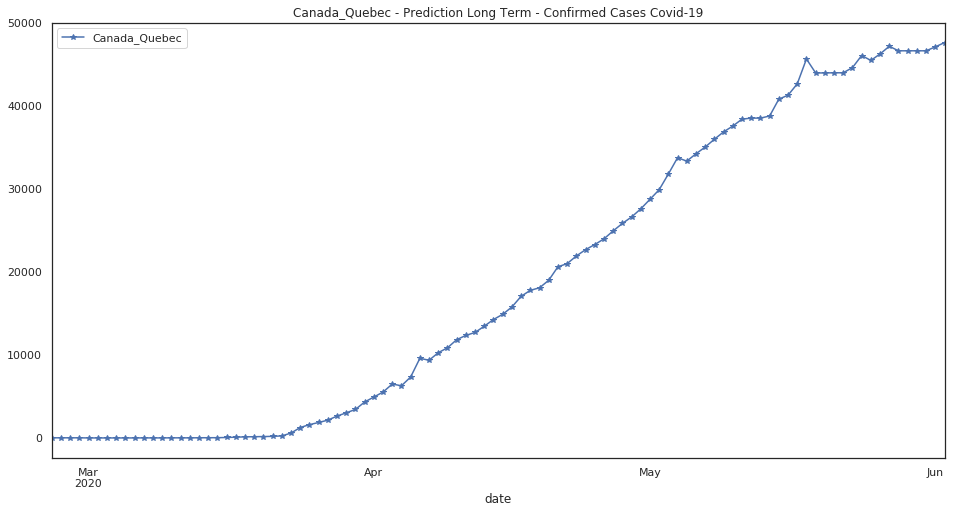

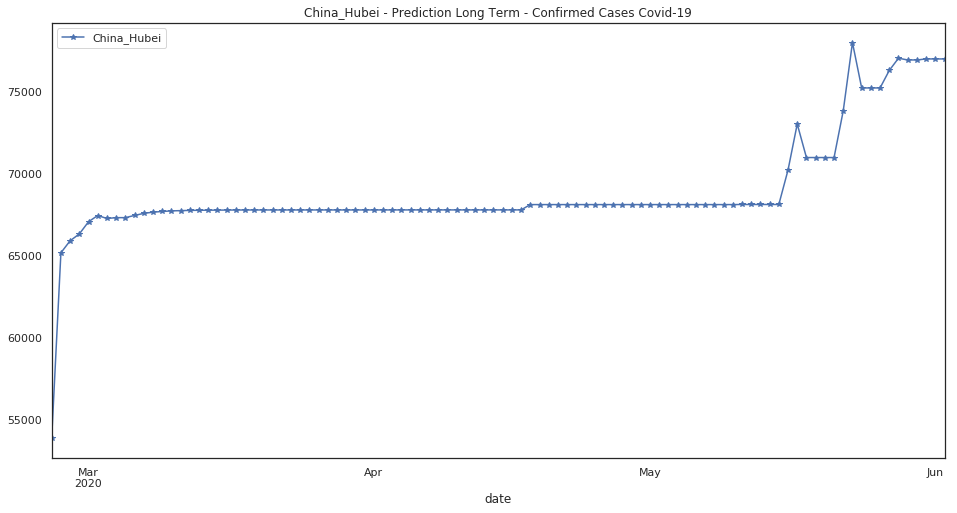

In [87]:
#
rgsx=['Italy_nan','Spain_nan','United States_nan','Switzerland_nan',
      'Germany_nan','United Kingdom_nan','France_nan','Iran_nan',
      'Sweden_nan','Netherlands_nan','Russia_nan','Poland_nan',
      'Brazil_nan','Turkey_nan','Japan_nan',
      'Portugal_nan','Canada_Ontario','Canada_Quebec','China_Hubei']
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

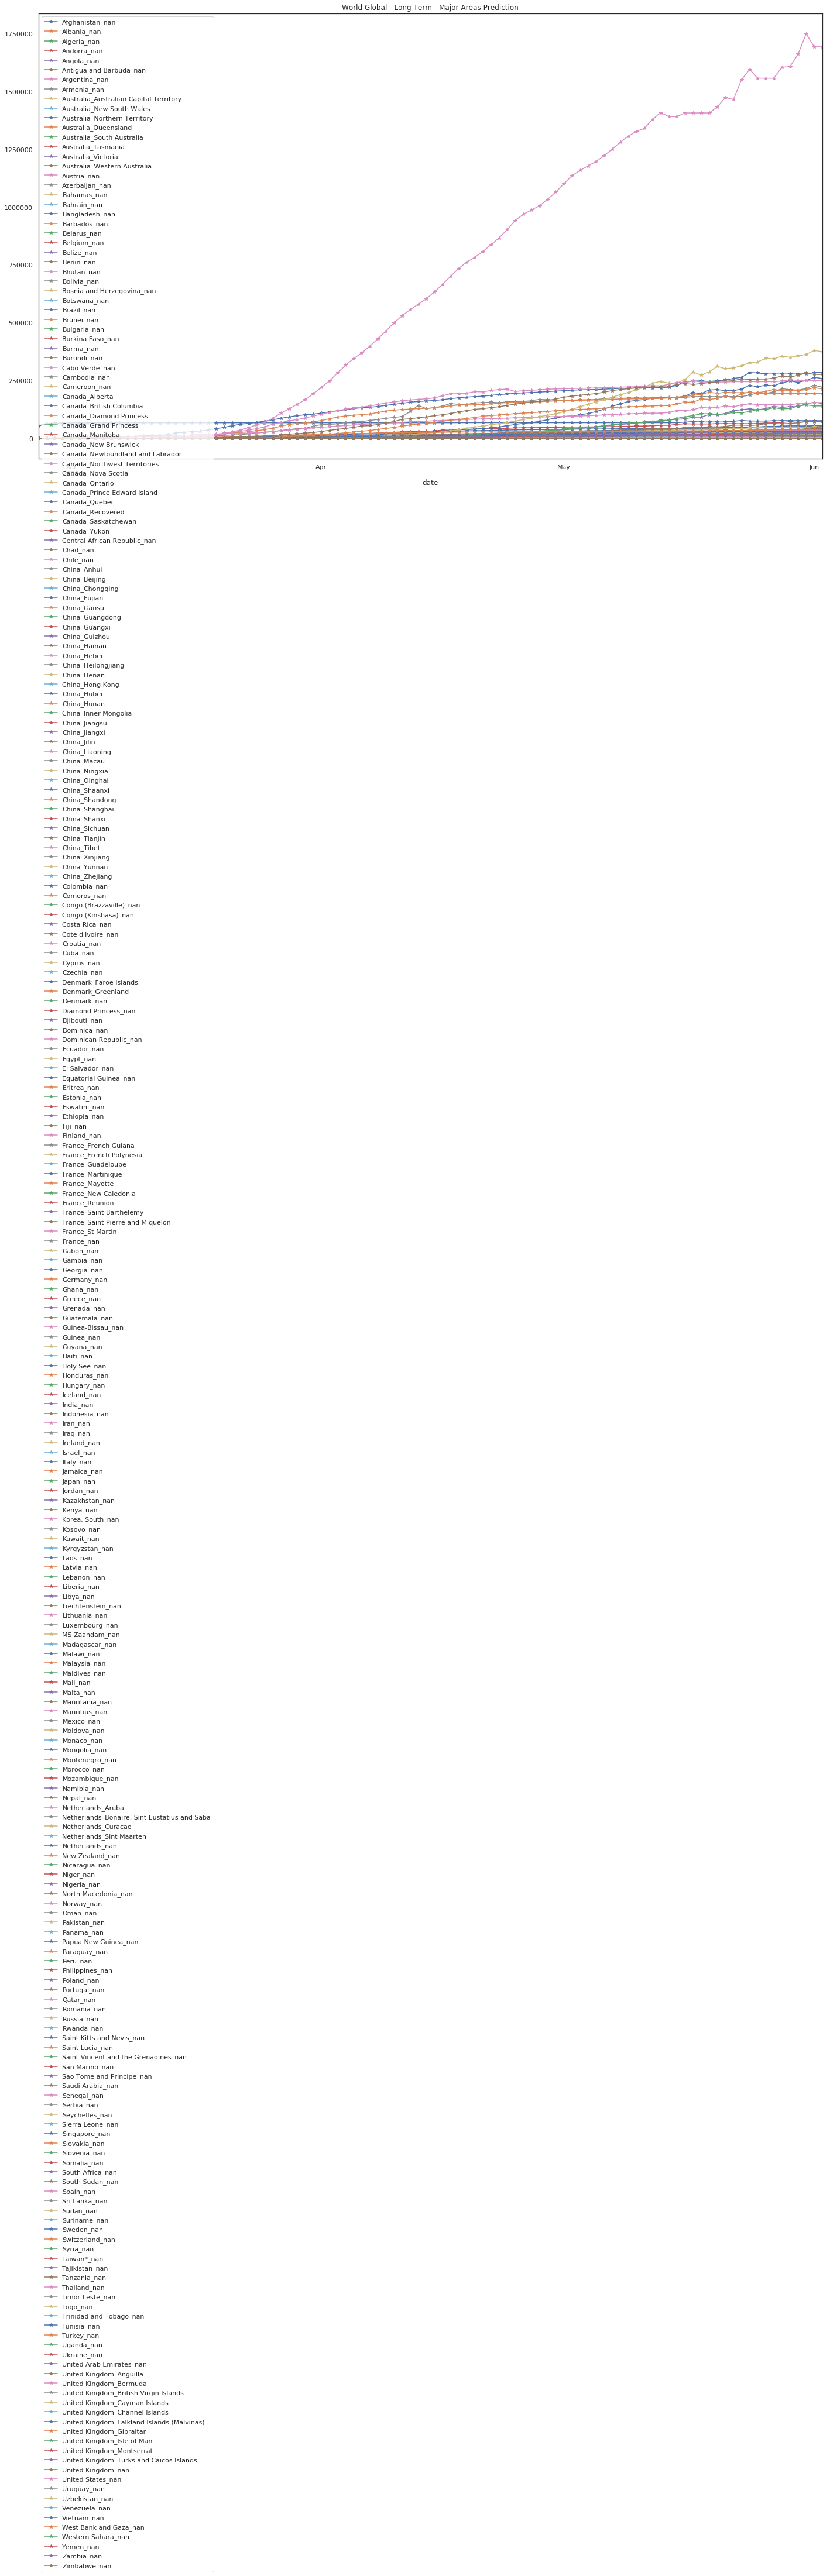

In [88]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [89]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [90]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-11            622.0        424.0       1931.0        606.0   
2020-04-12            669.0        447.0       1988.0        623.0   
2020-04-13            742.0        466.0       2077.0        668.0   
2020-04-14            795.0        484.0       2147.0        658.0   
2020-04-15            858.0        489.0       2249.0        679.0   
2020-04-16            929.0        521.0       2358.0        679.0   
2020-04-17            981.0        545.0       2520.0        689.0   
2020-04-18           1022.0        554.0       2677.0        718.0   
2020-04-19           1043.0        557.0       2746.0        713.0   
2020-04-20           1107.0        580.0       2817.0        724.0   
2020-04-21           1140.0        611.0       2894.0        719.0   
2020-04-22           1253.0        638.0       2991.0        721.0   
2020-04-23           1368.0        667.0       3093.0        727.0   
2020-04-24           1465.0        688.0       3211.0        729.0   
2020-04-25           1546.0        707.0       3365.0        745.0   
2020-04-26           1646.0        737.0       3502.0        746.0   
2020-04-27           1760.0        730.0       3633.0        746.0   
2020-04-28           1971.0        741.0       3769.0        750.0   
2020-04-29           2042.0        758.0       3950.0        745.0   
2020-04-30           2245.0        770.0       4166.0        748.0   
2020-05-01           2508.0        774.0       4278.0        749.0   
2020-05-02           2587.0        783.0       4412.0        750.0   
2020-05-03           2781.0        790.0       4569.0        754.0   
2020-05-04           3037.0        797.0       4770.0        755.0   
2020-05-05           3308.0        815.0       4953.0        757.0   
2020-05-06           3616.0        835.0       5129.0        756.0   
2020-05-07           3641.0        843.0       5288.0        756.0   
2020-05-08           3856.0        850.0       5494.0        757.0   
2020-05-09           4115.0        853.0       5679.0        758.0   
2020-05-10           4493.0        862.0       5848.0        761.0   
2020-05-11           4893.0        872.0       5995.0        760.0   
2020-05-12           5008.0        872.0       6054.0        760.0   
2020-05-13           5094.0        883.0       6321.0        784.0   
2020-05-14           5290.0        924.0       6728.0        813.0   
2020-05-15           5349.0        945.0       6374.0        790.0   
2020-05-16           5249.0        957.0       6395.0        790.0   
2020-05-17           5658.0        952.0       6371.0        786.0   
2020-05-18           6240.0        960.0       6465.0        786.0   
2020-05-19           6107.0        981.0       6587.0        787.0   
2020-05-20           6444.0        983.0       6718.0        788.0   
2020-05-21           6158.0       1041.0       7238.0        814.0   
2020-05-22           6227.0       1079.0       7292.0        842.0   
2020-05-23           6298.0       1085.0       7125.0        833.0   
2020-05-24           6283.0       1110.0       7131.0        848.0   
2020-05-25           6391.0       1166.0       7086.0        832.0   
2020-05-26           6475.0       1166.0       7360.0        867.0   
2020-05-27           6437.0       1225.0       7850.0        907.0   
2020-05-28           6445.0       1203.0       7971.0        874.0   
2020-05-29           6648.0       1272.0       8036.0        910.0   
2020-05-30           6901.0       1291.0       7837.0        954.0   
2020-05-31           6705.0       1318.0       7814.0        950.0   
2020-06-01           6705.0       1336.0       7982.0        950.0   
2020-06-02           6640.0       1325.0       8010.0        942.0   

region      Angola_nan  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
date                                                                  

In [91]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [92]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [93]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [94]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  13.193900  -59.543200   
240                              Canada_Recovered   0.000000    0.000000   
241                                      Laos_nan  19.856270  102.495496   
242                                     Libya_nan  26.335100   17.228331   
243                        West Bank and Gaza_nan  31.952200   35.233200   
244                             Guinea-Bissau_nan  11.803700  -15.180400   
245                                      Mali_nan  17.570692   -3.996166   
246                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
247                  Canada_Northwest Territories  64.825500 -124.845700   
248                                  Canada_Yukon  64.282300 -135.000000   
249                                    Kosovo_nan  42.602636   20.902977   
250                                     Burma_nan  21.916200   95.956000   
251                       United Kingdom_Anguilla  18.220600  -63.068600   
252         United Kingdom_British Virgin Islands  18.420700  -64.640000   
253       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
254                                MS Zaandam_nan   0.000000    0.000000   
255                                  Botswana_nan -22.328500   24.684900   
256                                   Burundi_nan  -3.373100   29.918900   
257                              Sierra Leone_nan   8.460555  -11.779889   
258  Netherlands_Bonaire, Sint Eustatius and Saba  12.178400  -68.238500   
259            

In [95]:
#!pip install folium
import folium
import re

lat=46.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat,lng,num,totpred in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]),sum(heatmap_m[heatmap_m.columns[3]] , heatmap_m[heatmap_m.columns[-1]] )):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' pred_confirmed='+str(round(totpred))+' date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [96]:
#
region_m2=region + ['Andorra_nan','Monaco_nan','San Marino_nan','Ireland_nan','Slovenia_nan','Slovakia_nan',
                    'Hungary_nan','Ukraine_nan','Croatia_nan','Finland_nan','Norway_nan','Estonia_nan','Denmark_nan',
                    'Chile_nan','Argentina_nan','Mexico_nan','Ecuador_nan','Peru_nan','Colombia_nan','Costa Rica_nan',
                    'South Africa_nan','Morocco_nan','Algeria_nan','Saudi Arabia_nan','Israel_nan','Japan_nan',
                    'Singapore_nan']
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                     region      Lat      Long  2020-02-26 00:00:00  \
0       2                Algeria_nan  28.0339    1.6596                 86.0   
1       3                Andorra_nan  42.5063    1.5218                 15.0   
2       6              Argentina_nan -38.4161  -63.6167                 15.0   
3       9  Australia_New South Wales -33.8688  151.2093                 89.0   
4      23                Belgium_nan  50.8333    4.0000                 35.0   
5      28                 Brazil_nan -14.2350  -51.9253                 79.0   
6      42             Canada_Ontario  51.2538  -85.3232                 40.0   
7      44              Canada_Quebec  52.9399  -73.5491                 15.0   
8      48                  Chile_nan -35.6751  -71.5430                 15.0   
9      61            China_Hong Kong  22.3000  114.2000                122.0   
10     62                China_Hubei  30.9756  112.2707              53901.0   
11     69                China_Macau  22.1667  113.5500                 65.0   
12     82               Colombia_nan   4.5709  -74.2973                 15.0   
13     85             Costa Rica_nan   9.7489  -83.7534                 15.0   
14     87                Croatia_nan  45.1000   15.2000                 56.0   
15     94                Denmark_nan  56.2639    9.5018                 15.0   
16     97                Ecuador_nan  -1.8312  -78.1834                 15.0   
17    102                Estonia_nan  58.5953   25.0136                 15.0   
18    106                Finland_nan  64.0000   26.0000                 46.0   
19    116                 France_nan  46.2276    2.2137                 63.0   
20    121                Germany_nan  51.0000    9.0000                 51.0   
21    130                Hungary_nan  47.1625   19.5033                 15.0   
22    132                  India_nan  21.0000   78.0000                109.0   
23    134                   Iran_nan  32.0000   53.0000                201.0   
24    136                Ireland_nan  53.1424   -7.6921                 15.0   
25    137                 Israel_nan  31.0000   35.0000                 40.0   
26    138                  Italy_nan  43.0000   12.0000                422.0   
27    140                  Japan_nan  36.0000  138.0000                213.0   
28    144           Korea, South_nan  36.0000  128.0000               1075.0   
29    160                 Mexico_nan  23.6345 -102.5528                 15.0   
30    162                 Monaco_nan  43.7333    7.4167                 15.0   
31    165                Morocco_nan  31.7917   -7.0926                 15.0   
32    171            Netherlands_nan  52.1326    5.2913                 15.0   
33    177                 Norway_nan  60.4720    8.4689                 40.0   
34    183                   Peru_nan  -9.1900  -75.0152                 15.0   
35    185                 Poland_nan  51.9194   19.1451                 45.0   
36    186               Portugal_nan  39.3999   -8.2245                 65.0   
37    189                 Russia_nan  60.0000   90.0000                 42.0   
38    193             San Marino_nan  43.9424   12.4578                 15.0   
39    194           Saudi Arabia_nan  24.0000   45.0000                 15.0   
40    198              Singapore_nan   1.2833  103.8333                149.0   
41    199               Slovakia_nan  48.6690   19.6990                 15.0   
42    200               Slovenia_nan  46.1512   14.9955                 15.0   
43    202           South Africa_nan -30.5595   22.9375                 15.0   
44    203                  Spain_nan  40.0000   -4.0000                 76.0   
45    207                 Sweden_nan  63.0000   16.0000                 42.0   
46    208            Switzerland_nan  46.8182    8.2275                 15.0   
47    209                Taiwan*_nan  23.7000  121.0000                 41.0   
48    215                 Turkey_nan  38.9637   35.2433                 15.0   
49  

In [97]:
import folium
import re

lat=46.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat2,lng2,num2,totpred2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]),sum(heatmap_m2[heatmap_m2.columns[3]] , heatmap_m2[heatmap_m2.columns[-1]] )):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' pred_confirmed='+str(round(totpred2))+' date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [98]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [99]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [100]:
exit()

H2O session _sid_acfb closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
